## Dataset Overview

This dataset contains transaction data intended for the analysis and detection of potential fraudulent activities. The data includes various attributes that provide insights into the transactional behavior, customer profiles, and other contextual details, making it suitable for applying different clustering and anomaly detection techniques.

### Key Features:
- **🆔 TransactionID:** A unique identifier for each transaction.
- **👤 AccountID:** A unique identifier for the account associated with the transaction.
- **💰 TransactionAmount:** The monetary value of each transaction, varying from small expenses to large purchases.
- **📅 TransactionDate:** The date and time when the transaction occurred.
- **🔄 TransactionType:** Categorical value indicating whether the transaction was a 'Credit' or 'Debit'.
- **📍 Location:** The geographic location where the transaction took place.
- **📱 DeviceID:** A unique identifier for the device used to perform the transaction.
- **🌐 IP Address:** The IP address associated with the transaction.
- **🏪 MerchantID:** A unique identifier for merchants involved in the transaction.
- **📡 Channel:** Indicates the channel through which the transaction was conducted (e.g., Online, ATM, Branch).
- **💵 AccountBalance:** The balance remaining in the account after the transaction.
- **⏱️ TransactionDuration:** Duration of the transaction in seconds.
- **🔐 LoginAttempts:** The number of login attempts made before the transaction.

### Objectives:
- **🕵️‍♂️ Fraud Detection:** Utilize clustering algorithms and anomaly detection techniques to identify potential fraudulent transactions.
- **📈 Behavioral Insights:** Gain insights into transactional behavior patterns to understand normal vs. anomalous behavior.

# **Imports and Setup**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor

import warnings
warnings.filterwarnings("ignore")

# **Load and Explore Dataset**


In [ ]:
# Load the dataset
df = pd.read_csv('/content/bank_transactions_data_2.csv')

In [ ]:
# Display basic information about the dataset
print("Shape of the dataset:", df.shape)
display(df.head())
print("\nDataset Information:")
print(df.info())
print("\nStatistical Summary:")
display(df.describe().T)

Shape of the dataset: (2512, 16)


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  Ac

,count,mean,std,min,25%,50%,75%,max
TransactionAmount,2512.0,297.593778,291.946243,0.26,81.885,211.14,414.5275,1919.11
CustomerAge,2512.0,44.673965,17.792198,18.00,27.000,45.00,59.0000,80.00
TransactionDuration,2512.0,119.643312,69.963757,10.00,63.000,112.50,161.0000,300.00
LoginAttempts,2512.0,1.124602,0.602662,1.00,1.000,1.00,1.0000,5.00
AccountBalance,2512.0,5114.302966,3900.942499,101.25,1504.370,4735.51,7678.8200,14977.99


# **An overview:**

### Shape of the Dataset:
- Number of Rows: 2,512
- Number of Columns: 16

### Dataset Information:
- Total Columns: 16
- Numeric columns include `TransactionAmount`, `CustomerAge`, `TransactionDuration`, `LoginAttempts`, and `AccountBalance`.
- Date columns like `TransactionDate` and `PreviousTransactionDate` will likely need to be converted to datetime objects for time-series analysis.
- Categorical columns include fields like `TransactionType`, `Location`, `Channel`, etc.

### Statistical Summary:
- The mean transaction amount is approximately 297.59.
- `CustomerAge` ranges from 18 to 80, with an average age of approximately 44.67.
- `AccountBalance` ranges significantly, with a maximum of around 14,978.


In [ ]:
# Check for missing and duplicated values
print(f'\nMissing values: {df.isna().sum().sum()}')
print(f'Duplicated values: {df.duplicated().sum()}')


Missing values: 0
Duplicated values: 0


In [ ]:
# Display the number of unique values in each column
print("\nUnique Values in Each Column:")
print(df.nunique())


Unique Values in Each Column:
TransactionID              2512
AccountID                   495
TransactionAmount          2455
TransactionDate            2512
TransactionType               2
Location                     43
DeviceID                    681
IP Address                  592
MerchantID                  100
Channel                       3
CustomerAge                  63
CustomerOccupation            4
TransactionDuration         288
LoginAttempts                 5
AccountBalance             2510
PreviousTransactionDate     360
dtype: int64


In [ ]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display the lists of numerical and categorical columns
print("\nNumerical Columns:", numerical_columns)
print("Categorical Columns:", non_numerical_columns)


Numerical Columns: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
Categorical Columns: ['TransactionID', 'AccountID', 'TransactionDate', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation', 'PreviousTransactionDate']


In [ ]:
# Display unique values for each categorical column
for col in non_numerical_columns:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {df[col].unique()}")


Column: TransactionID
Unique Values: ['TX000001' 'TX000002' 'TX000003' ... 'TX002510' 'TX002511' 'TX002512']

Column: AccountID
Unique Values: ['AC00128' 'AC00455' 'AC00019' 'AC00070' 'AC00411' 'AC00393' 'AC00199'
 'AC00069' 'AC00135' 'AC00385' 'AC00150' 'AC00459' 'AC00392' 'AC00264'
 'AC00085' 'AC00270' 'AC00317' 'AC00359' 'AC00242' 'AC00285' 'AC00002'
 'AC00014' 'AC00095' 'AC00453' 'AC00241' 'AC00041' 'AC00441' 'AC00057'
 'AC00390' 'AC00313' 'AC00367' 'AC00291' 'AC00060' 'AC00365' 'AC00267'
 'AC00404' 'AC00202' 'AC00478' 'AC00405' 'AC00421' 'AC00480' 'AC00120'
 'AC00117' 'AC00011' 'AC00401' 'AC00282' 'AC00439' 'AC00296' 'AC00471'
 'AC00159' 'AC00482' 'AC00115' 'AC00055' 'AC00419' 'AC00374' 'AC00271'
 'AC00456' 'AC00143' 'AC00427' 'AC00438' 'AC00425' 'AC00325' 'AC00434'
 'AC00319' 'AC00460' 'AC00461' 'AC00395' 'AC00217' 'AC00053' 'AC00110'
 'AC00265' 'AC00239' 'AC00007' 'AC00022' 'AC00464' 'AC00406' 'AC00445'
 'AC00236' 'AC00220' 'AC00140' 'AC00098' 'AC00303' 'AC00373' 'AC00437'
 'AC

# **Exploratory Data Analysis (EDA)**

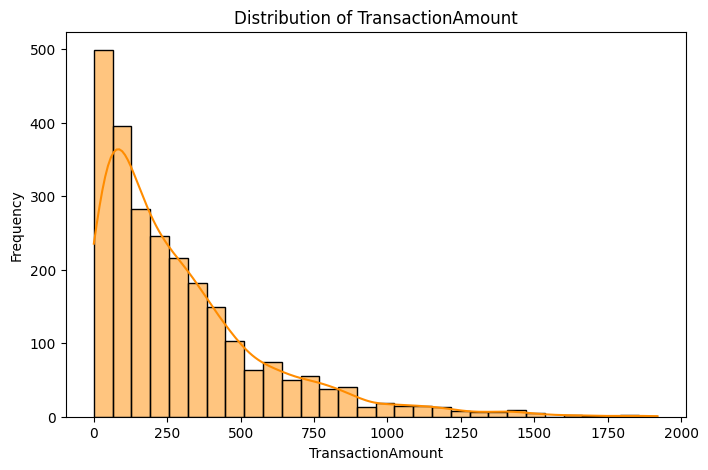

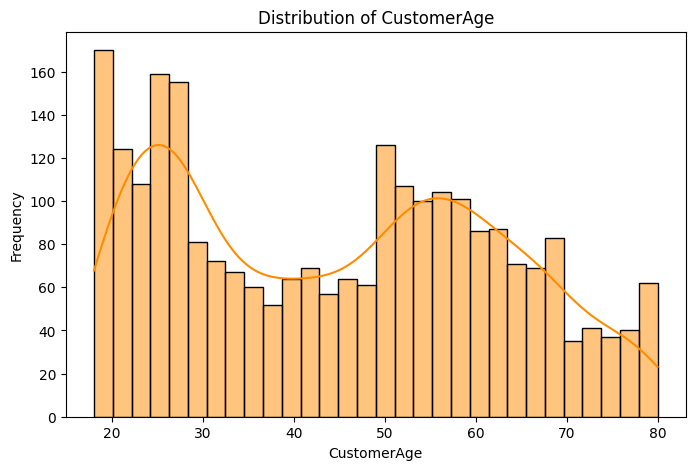

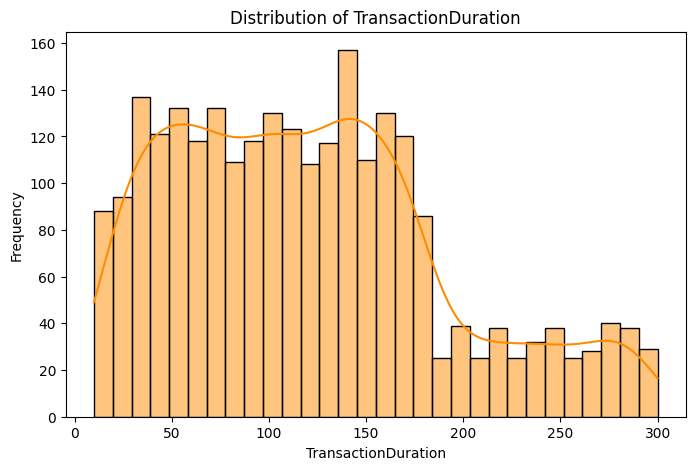

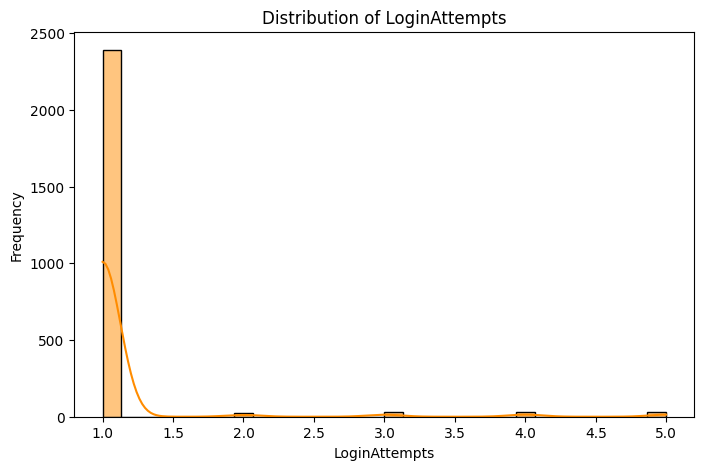

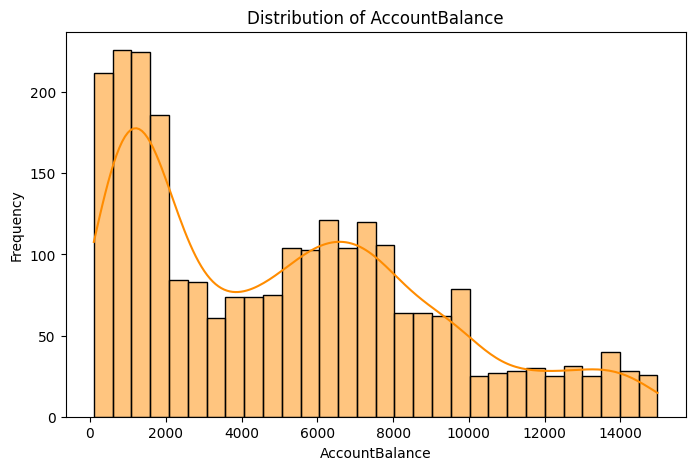

In [ ]:
def plot_histograms(df, numerical_columns):
    for column in numerical_columns:
        plt.figure(figsize=(8, 5))
        # Create a histogram with KDE
        sns.histplot(df[column], bins=30, kde=True, color='#ff8c00')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

numerical_columns = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

plot_histograms(df, numerical_columns)

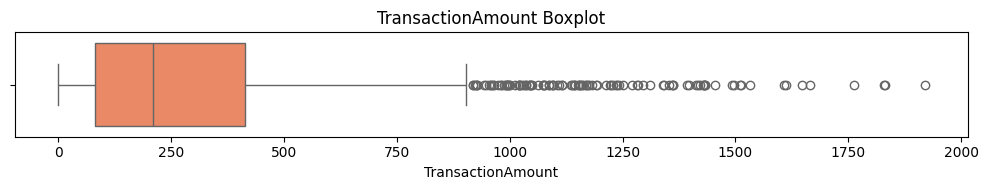


Summary Statistics for TransactionAmount:
 count    2512.000000
mean      297.593778
std       291.946243
min         0.260000
25%        81.885000
50%       211.140000
75%       414.527500
max      1919.110000
Name: TransactionAmount, dtype: float64


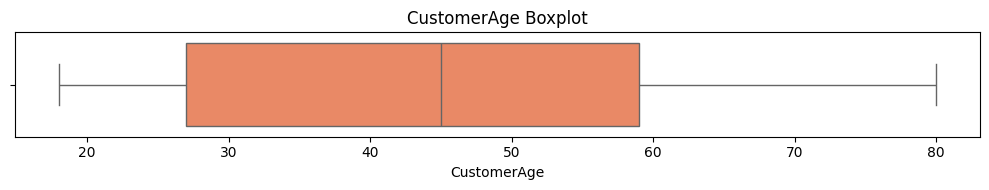


Summary Statistics for CustomerAge:
 count    2512.000000
mean       44.673965
std        17.792198
min        18.000000
25%        27.000000
50%        45.000000
75%        59.000000
max        80.000000
Name: CustomerAge, dtype: float64


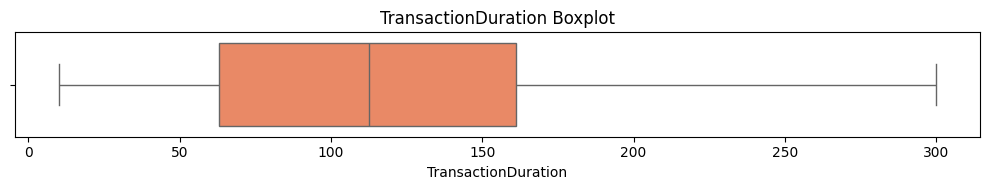


Summary Statistics for TransactionDuration:
 count    2512.000000
mean      119.643312
std        69.963757
min        10.000000
25%        63.000000
50%       112.500000
75%       161.000000
max       300.000000
Name: TransactionDuration, dtype: float64


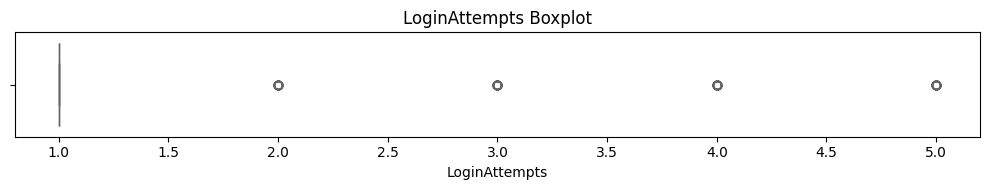


Summary Statistics for LoginAttempts:
 count    2512.000000
mean        1.124602
std         0.602662
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: LoginAttempts, dtype: float64


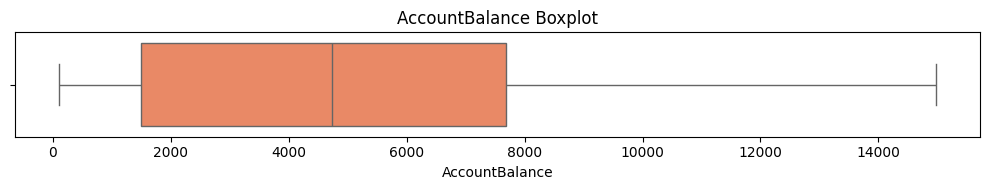


Summary Statistics for AccountBalance:
 count     2512.000000
mean      5114.302966
std       3900.942499
min        101.250000
25%       1504.370000
50%       4735.510000
75%       7678.820000
max      14977.990000
Name: AccountBalance, dtype: float64


In [ ]:
# Function to perform univariate analysis for numeric columns
def univariate_analysis(data, column, title):
    plt.figure(figsize=(10, 2))

    # Create a boxplot with the specified color
    sns.boxplot(x=data[column], color='coral')
    plt.title(f'{title} Boxplot')

    plt.tight_layout()
    plt.show()

    # Print summary statistics for the specified column
    print(f'\nSummary Statistics for {title}:\n', data[column].describe())

numerical_columns = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

for column in numerical_columns:
    univariate_analysis(df, column, column.replace('_', ' '))

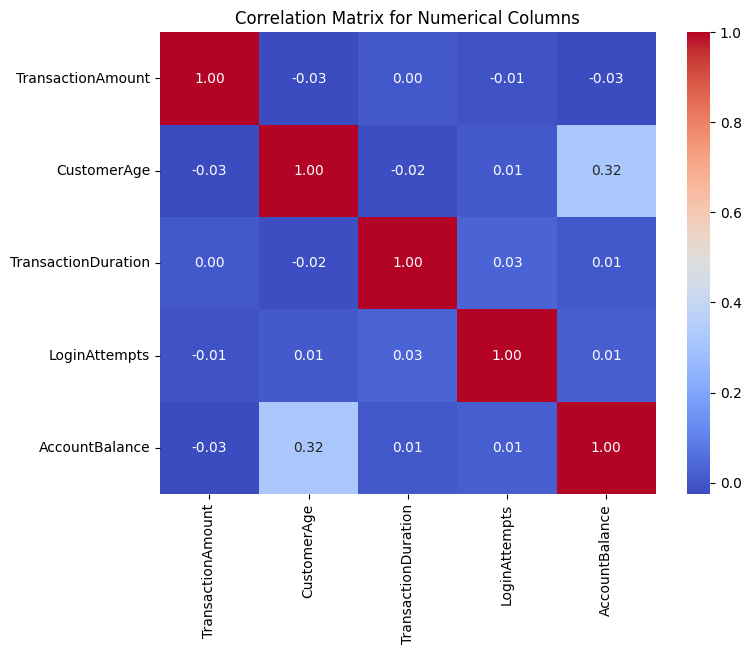

In [ ]:
# Display correlation matrix for numerical columns
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

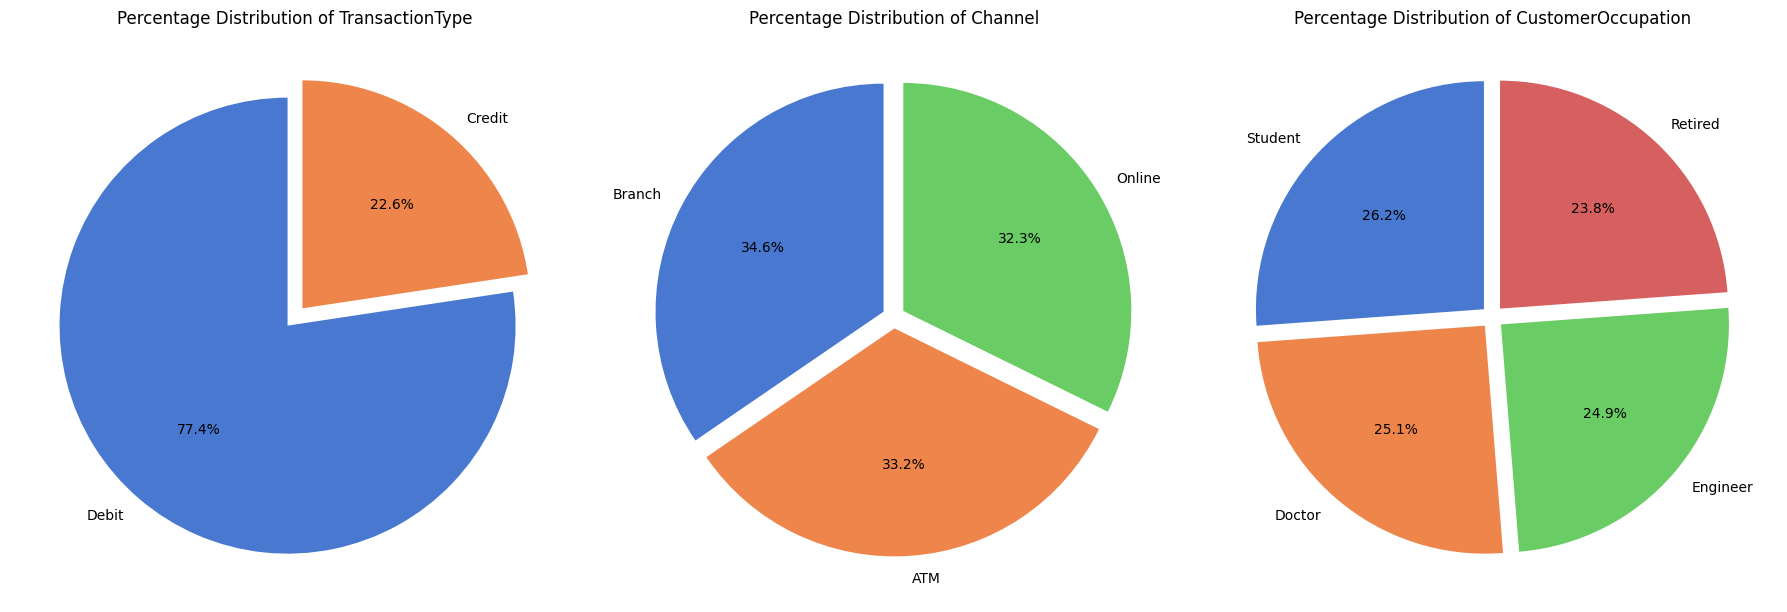

In [ ]:
def plot_categorical_distributions(columns, data=df, palette='muted'):
    plt.figure(figsize=(18, 6))

    # Loop through each column and create a pie chart
    for i, column_name in enumerate(columns):
        plt.subplot(1, 3, i + 1)
        value_counts = data[column_name].value_counts()
        value_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette(palette),
                               startangle=90, explode=[0.05] * value_counts.nunique())

        plt.title(f'Percentage Distribution of {column_name}')
        plt.ylabel('')

    plt.tight_layout()
    plt.show()

# Example usage
columns_to_plot = ['TransactionType', 'Channel', 'CustomerOccupation']
plot_categorical_distributions(columns_to_plot)

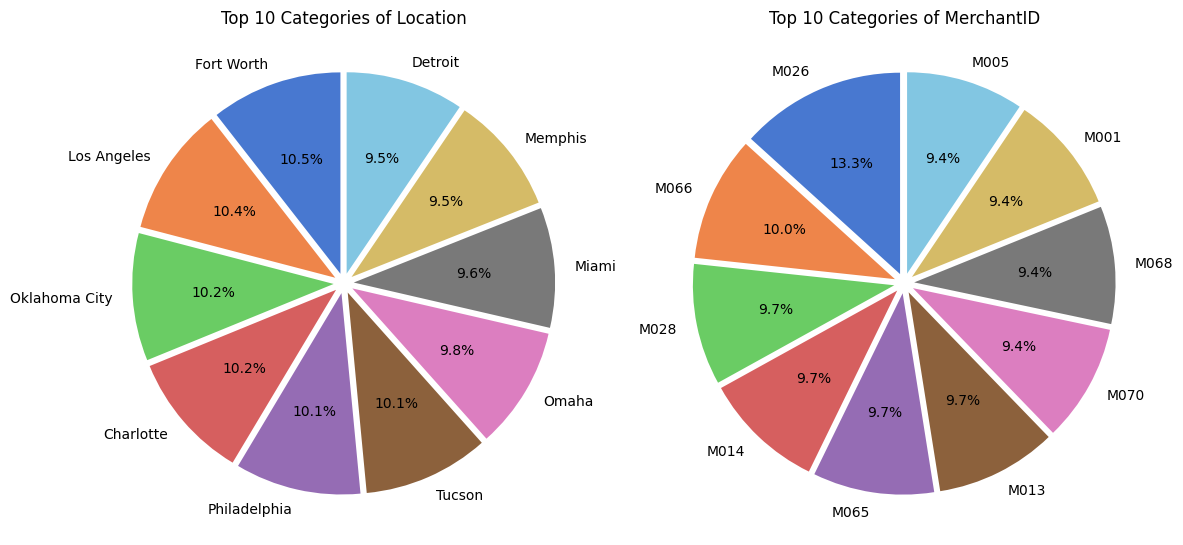

In [ ]:
def plot_top_categories_pie_charts(columns, data=df, palette='muted'):
    plt.figure(figsize=(len(columns) * 6, 6))

    # Loop through each column and create a pie chart
    for i, column_name in enumerate(columns):
        plt.subplot(1, len(columns), i + 1)

        # Get the top 10 categories based on frequency
        top_categories = data[column_name].value_counts().nlargest(10)

        # Plot the pie chart
        top_categories.plot.pie(autopct='%1.1f%%', colors=sns.color_palette(palette),
                                 startangle=90, explode=[0.05] * len(top_categories))

        plt.title(f'Top 10 Categories of {column_name}')
        plt.ylabel('')

    plt.tight_layout()
    plt.show()

# Example usage
columns_to_plot = ['Location', 'MerchantID']
plot_top_categories_pie_charts(columns_to_plot)

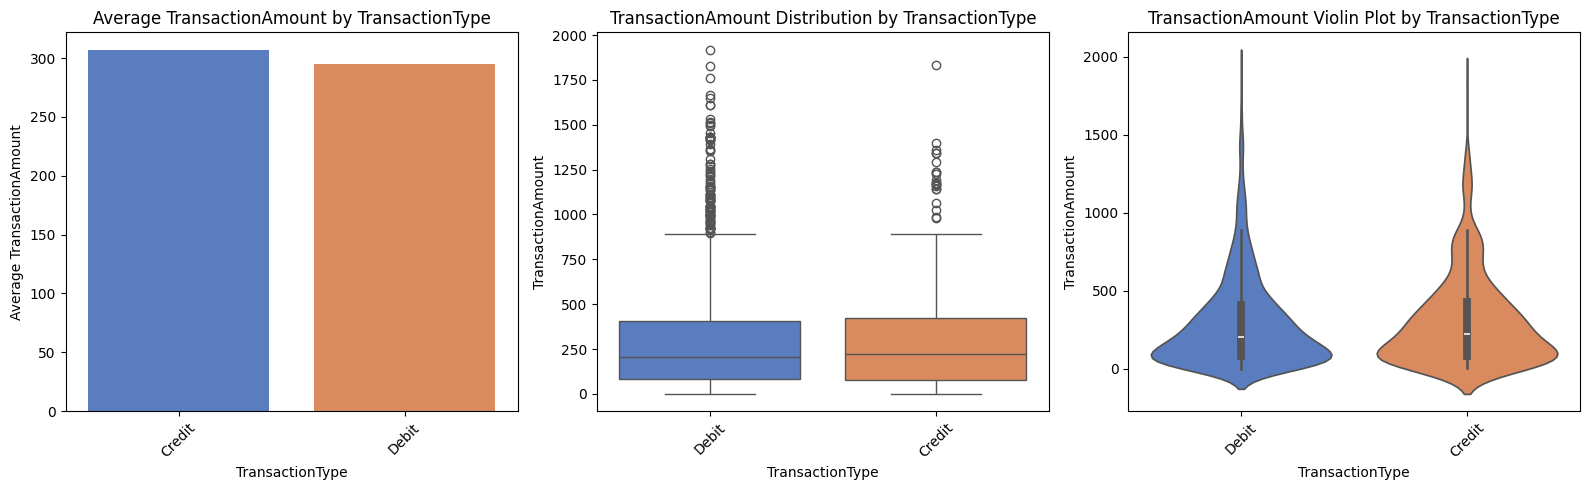

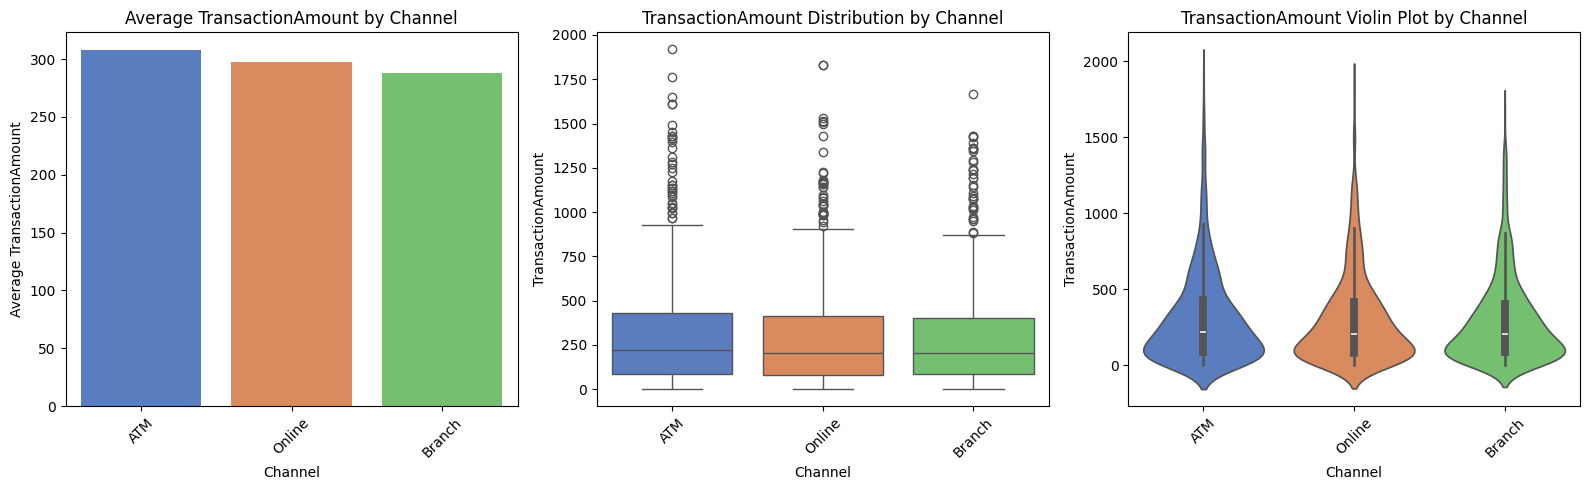

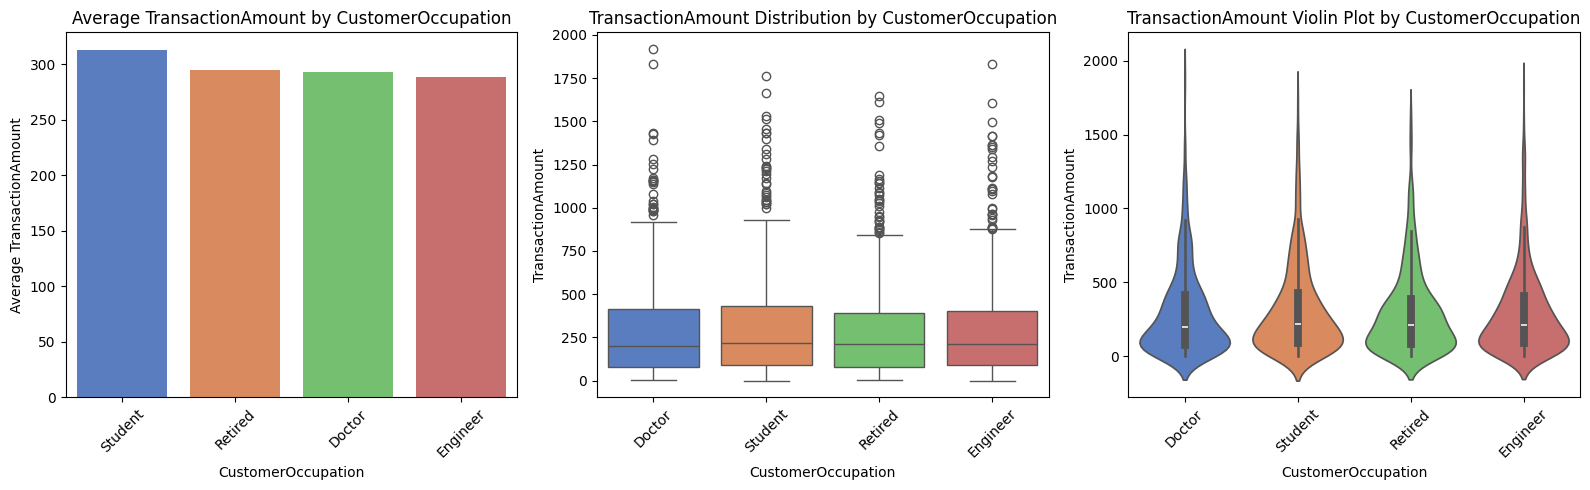

In [ ]:
# Define a function to create bar plots, boxplots, and violin plots for relationships between a categorical variable and TransactionAmount
def plot_categorical_relationships(column_name, data=df):
    plt.figure(figsize=(16, 5))

    # Bar Plot
    plt.subplot(1, 3, 1)
    avg_transaction = data.groupby(column_name)['TransactionAmount'].mean().sort_values(ascending=False)
    sns.barplot(x=avg_transaction.index, y=avg_transaction.values, palette='muted')
    plt.title(f'Average TransactionAmount by {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Average TransactionAmount')
    plt.xticks(rotation=45)

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=column_name, y='TransactionAmount', data=data, palette='muted')
    plt.title(f'TransactionAmount Distribution by {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('TransactionAmount')
    plt.xticks(rotation=45)

    # Violin Plot
    plt.subplot(1, 3, 3)
    sns.violinplot(x=column_name, y='TransactionAmount', data=data, palette='muted')
    plt.title(f'TransactionAmount Violin Plot by {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('TransactionAmount')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# Execute plots for each target categorical variable
target_categorical_variables = ['TransactionType', 'Channel', 'CustomerOccupation']
for column in target_categorical_variables:
    plot_categorical_relationships(column)

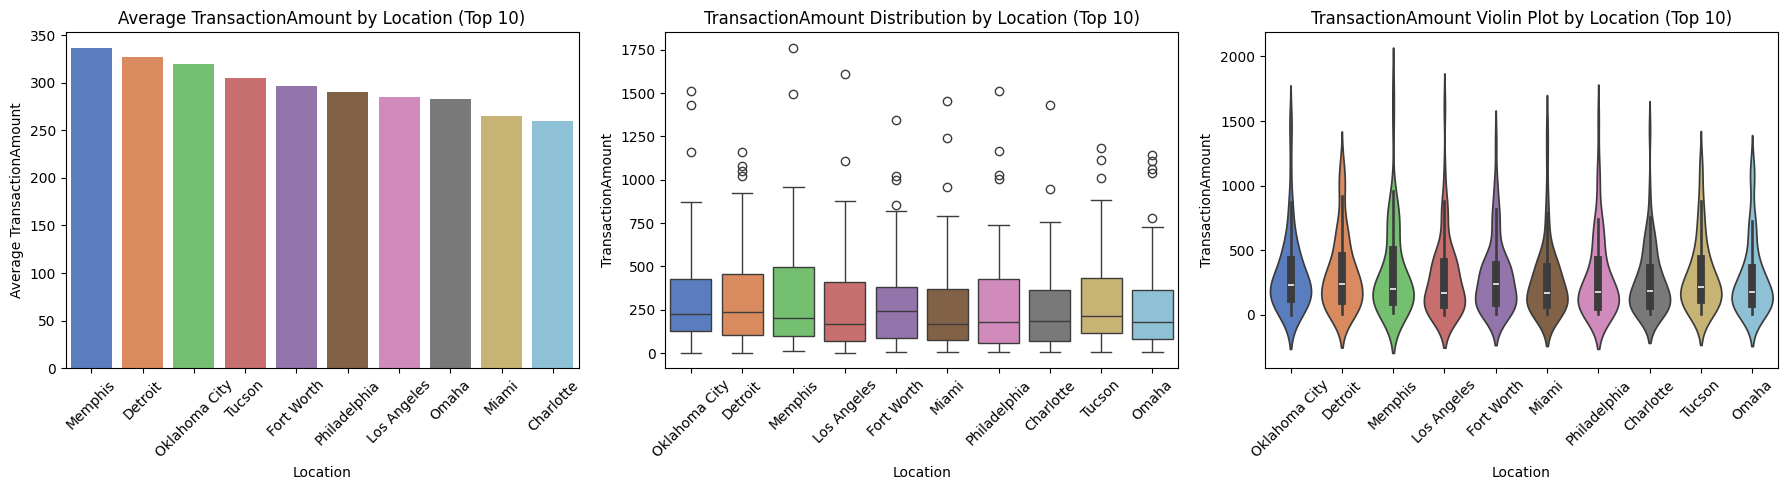

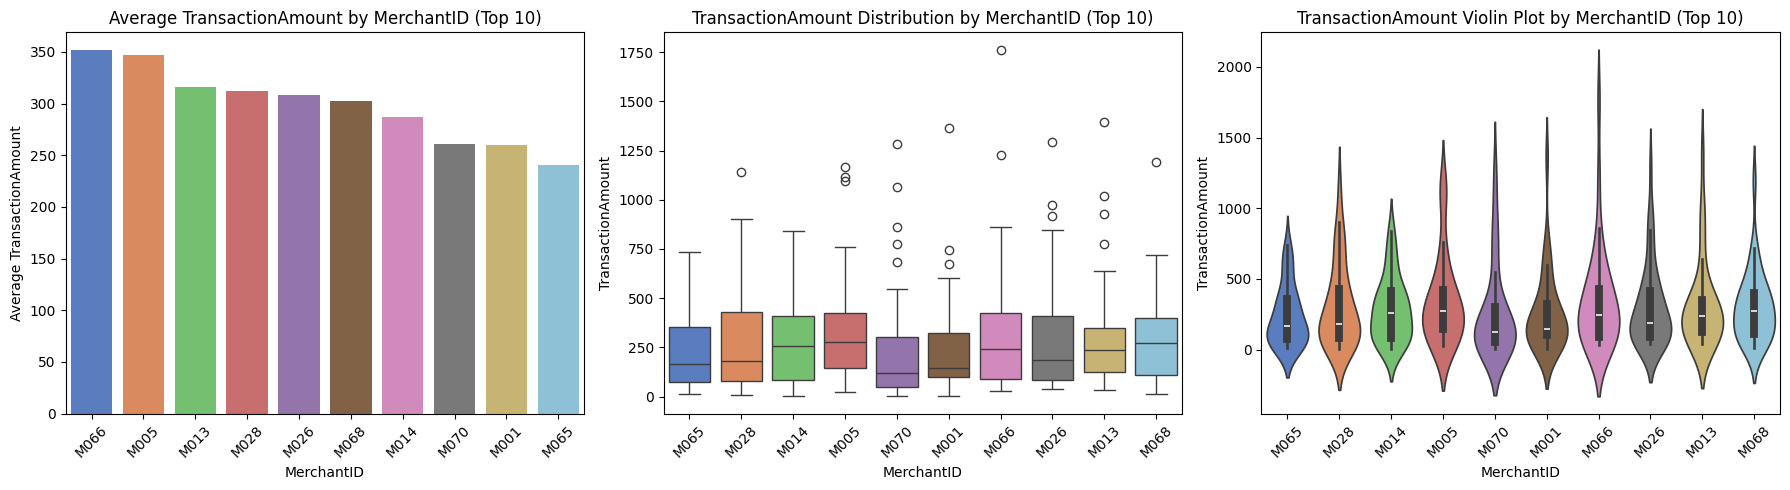

In [ ]:
def plot_categorical_relationships_improved(column_name, data=df, top_n=15):
    # Get top categories based on frequency
    top_categories = data[column_name].value_counts().index[:top_n]
    filtered_data = data[data[column_name].isin(top_categories)]

    plt.figure(figsize=(18, 5))

    # Bar Plot
    plt.subplot(1, 3, 1)
    avg_transaction = filtered_data.groupby(column_name)['TransactionAmount'].mean().sort_values(ascending=False)
    sns.barplot(x=avg_transaction.index, y=avg_transaction.values, palette='muted')
    plt.title(f'Average TransactionAmount by {column_name} (Top {top_n})')
    plt.xlabel(column_name)
    plt.ylabel('Average TransactionAmount')
    plt.xticks(rotation=45)

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=column_name, y='TransactionAmount', data=filtered_data, palette='muted')
    plt.title(f'TransactionAmount Distribution by {column_name} (Top {top_n})')
    plt.xlabel(column_name)
    plt.ylabel('TransactionAmount')
    plt.xticks(rotation=45)

    # Violin Plot
    plt.subplot(1, 3, 3)
    sns.violinplot(x=column_name, y='TransactionAmount', data=filtered_data, palette='muted')
    plt.title(f'TransactionAmount Violin Plot by {column_name} (Top {top_n})')
    plt.xlabel(column_name)
    plt.ylabel('TransactionAmount')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# Execute improved plots for 'Location' and 'MerchantID'
plot_categorical_relationships_improved('Location', top_n=10)
plot_categorical_relationships_improved('MerchantID', top_n=10)

Number of high-value transactions (top 5%): 126


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
74,TX000075,AC00265,1212.51,2023-10-04 16:36:29,Debit,Indianapolis,D000231,193.83.0.183,M036,Branch,20,Student,24,1,605.95,2024-11-04 08:06:51
82,TX000083,AC00236,922.55,2023-01-23 16:32:48,Debit,Detroit,D000206,21.97.154.92,M004,ATM,63,Retired,87,1,4715.84,2024-11-04 08:11:07
85,TX000086,AC00098,1340.19,2023-09-29 17:22:10,Credit,Austin,D000574,165.114.224.47,M012,Online,54,Engineer,30,1,8654.28,2024-11-04 08:06:53
110,TX000111,AC00068,1045.22,2023-11-22 16:13:39,Debit,Columbus,D000400,77.7.223.184,M077,ATM,53,Retired,73,1,1829.90,2024-11-04 08:07:35
129,TX000130,AC00320,1036.66,2023-07-11 16:39:53,Debit,San Antonio,D000015,53.218.177.171,M062,Branch,58,Doctor,144,1,5541.57,2024-11-04 08:09:24


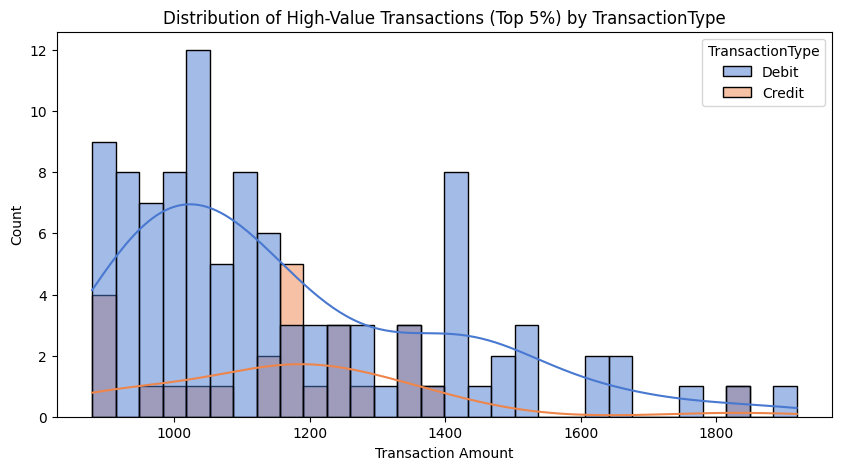

In [ ]:
high_value_threshold = df['TransactionAmount'].quantile(0.95)
high_value_transactions = df[df['TransactionAmount'] > high_value_threshold]
print(f"Number of high-value transactions (top 5%): {len(high_value_transactions)}")
display(high_value_transactions.head())

# Plot high-value transactions
# Adding TransactionType as hue for high-value transactions
plt.figure(figsize=(10, 5))
sns.histplot(data=high_value_transactions, x='TransactionAmount', bins=30, kde=True, hue='TransactionType', palette='muted')
plt.title('Distribution of High-Value Transactions (Top 5%) by TransactionType')
plt.xlabel('Transaction Amount')
plt.show()

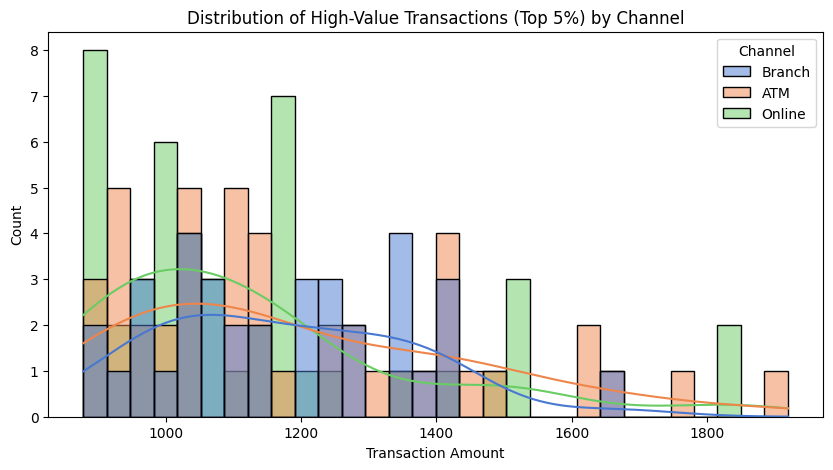

In [ ]:
# Plotting high-value transactions with 'Channel' as hue
plt.figure(figsize=(10, 5))
sns.histplot(data=high_value_transactions, x='TransactionAmount', bins=30, kde=True, hue='Channel', palette='muted')
plt.title('Distribution of High-Value Transactions (Top 5%) by Channel')
plt.xlabel('Transaction Amount')
plt.show()

Number of frequent transactions (within 1 hour): 16


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TimeDifference
95,TX000096,AC00010,508.68,2023-06-26 16:16:50,Credit,Mesa,D000622,193.108.17.115,M048,Branch,51,Engineer,127,1,7708.41,2024-11-04 08:09:32,505.0
1258,TX001259,AC00020,603.23,2023-08-24 17:34:13,Debit,Detroit,D000238,38.210.156.148,M017,Branch,28,Student,48,1,117.98,2024-11-04 08:08:18,2812.0
2497,TX002498,AC00030,348.17,2023-05-10 17:56:31,Debit,El Paso,D000269,82.51.236.134,M072,ATM,21,Student,181,1,1887.84,2024-11-04 08:11:06,394.0
496,TX000497,AC00114,286.50,2023-10-23 16:58:04,Credit,Boston,D000602,16.128.130.153,M097,Branch,30,Engineer,60,1,8517.95,2024-11-04 08:09:17,451.0
2341,TX002342,AC00144,97.73,2023-05-29 17:55:23,Debit,Sacramento,D000038,135.29.211.116,M018,Branch,69,Doctor,156,1,7885.21,2024-11-04 08:08:27,2480.0


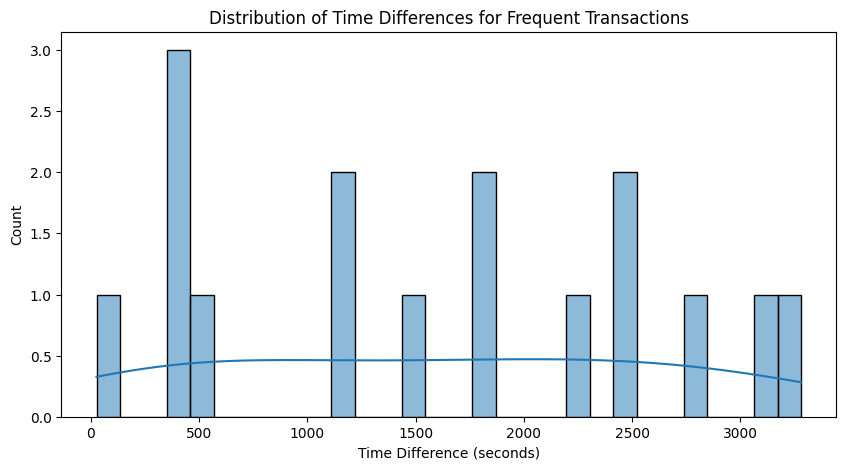

In [ ]:
# Đảm bảo TransactionDate ở dạng datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Sắp xếp dữ liệu theo AccountID và thời gian giao dịch
df_sorted = df.sort_values(by=['AccountID', 'TransactionDate'])

# Tính khoảng thời gian giữa các giao dịch liên tiếp trong cùng một Account
df_sorted['TimeDifference'] = df_sorted.groupby('AccountID')['TransactionDate'].diff().dt.total_seconds()

# Lọc các giao dịch diễn ra cách nhau dưới 1 giờ
short_interval_threshold = 3600  # 1 giờ (tính bằng giây)
rapid_transactions = df_sorted[df_sorted['TimeDifference'] <= short_interval_threshold]

# In kết quả
print(f"Number of transactions with time difference <= 1 hour: {len(rapid_transactions)}")
display(rapid_transactions.head())

# Vẽ biểu đồ phân phối khoảng cách thời gian giữa các giao dịch nhanh
plt.figure(figsize=(10, 5))
sns.histplot(rapid_transactions['TimeDifference'].dropna(), bins=30, kde=True, color='teal')
plt.title('Distribution of Time Differences (≤ 1 Hour) Between Transactions', fontsize=14)
plt.xlabel('Time Difference (seconds)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

Number of transactions with large balance changes: 125


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,BalanceChange
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,13382.67
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,Credit,Seattle,D000241,140.212.253.222,M019,ATM,37,Doctor,139,1,13316.71,2024-11-04 08:10:09,13323.79
34,TX000035,AC00365,255.26,2023-10-27 16:42:49,Credit,San Francisco,D000357,92.214.76.157,M002,Branch,45,Doctor,50,1,14815.87,2024-11-04 08:10:51,15071.13
41,TX000042,AC00480,34.02,2023-01-09 16:13:21,Debit,Philadelphia,D000627,109.105.179.186,M046,Online,38,Doctor,19,1,14214.48,2024-11-04 08:11:45,14180.46
42,TX000043,AC00120,241.42,2023-04-20 18:57:43,Credit,Charlotte,D000198,60.89.202.192,M044,Online,57,Doctor,116,1,13357.02,2024-11-04 08:09:03,13598.44


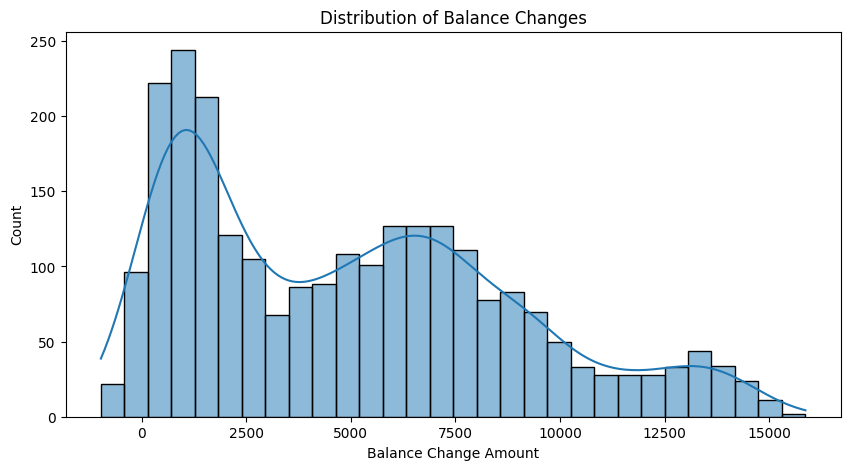

In [ ]:
# Calculate change in AccountBalance for each transaction, considering TransactionType
df['BalanceChange'] = df.apply(
    lambda row: row['AccountBalance'] - row['TransactionAmount'] if row['TransactionType'] == 'Debit'
    else row['AccountBalance'] + row['TransactionAmount'],
    axis=1
)

# Identify large balance changes based on threshold (e.g., 2 standard deviations)
balance_change_threshold = df['BalanceChange'].mean() + 2 * df['BalanceChange'].std()
large_balance_changes = df[df['BalanceChange'].abs() > balance_change_threshold]
print(f"Number of transactions with large balance changes: {len(large_balance_changes)}")
display(large_balance_changes.head())

# Visualize balance changes
plt.figure(figsize=(10, 5))
sns.histplot(df['BalanceChange'], bins=30, kde=True)
plt.title('Distribution of Balance Changes')
plt.xlabel('Balance Change Amount')
plt.show()

- This approach captures unusual transactions by identifying large deviations in balance changes, accounting for transaction types. It helps flag potential fraud based on substantial deviations from typical account behavior.

Number of transactions with more than one login attempt: 122


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,BalanceChange
23,TX000024,AC00453,345.84,2023-05-02 18:25:46,Debit,Fort Worth,D000162,191.82.103.198,M083,Online,22,Student,142,3,1402.50,2024-11-04 08:07:04,1056.66
26,TX000027,AC00441,246.93,2023-04-17 16:37:01,Debit,Miami,D000046,55.154.161.250,M029,ATM,23,Student,158,5,673.35,2024-11-04 08:11:38,426.42
32,TX000033,AC00060,396.45,2023-09-25 16:26:00,Debit,New York,D000621,133.67.250.163,M007,ATM,49,Engineer,168,3,9690.15,2024-11-04 08:11:13,9293.70
38,TX000039,AC00478,795.31,2023-10-12 17:07:40,Debit,Mesa,D000077,49.29.37.185,M048,ATM,66,Doctor,90,2,7914.88,2024-11-04 08:11:17,7119.57
61,TX000062,AC00002,263.99,2023-05-16 16:07:30,Debit,Dallas,D000285,7.146.35.122,M087,Branch,79,Retired,227,2,4175.02,2024-11-04 08:11:03,3911.03


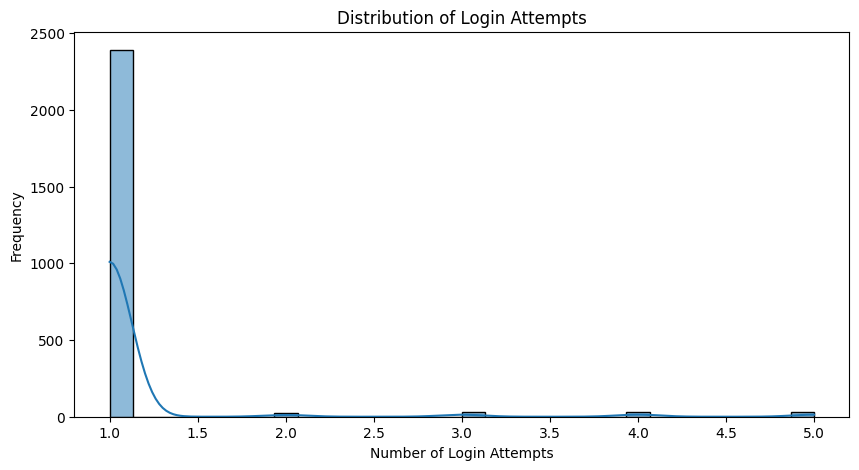

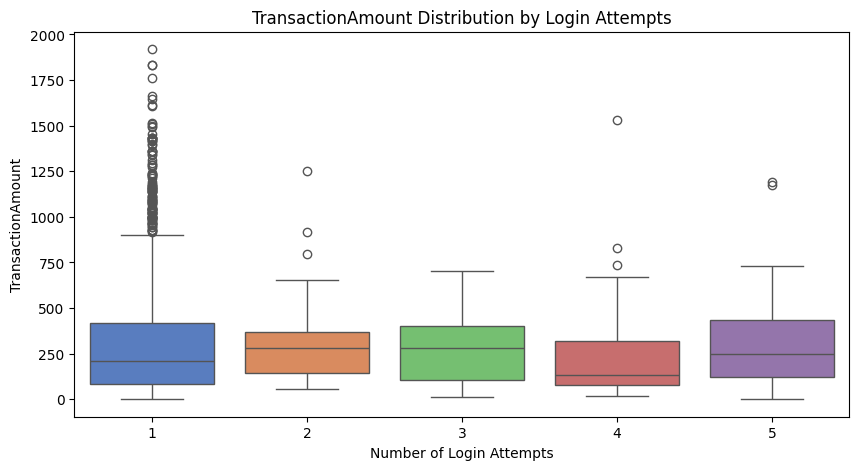

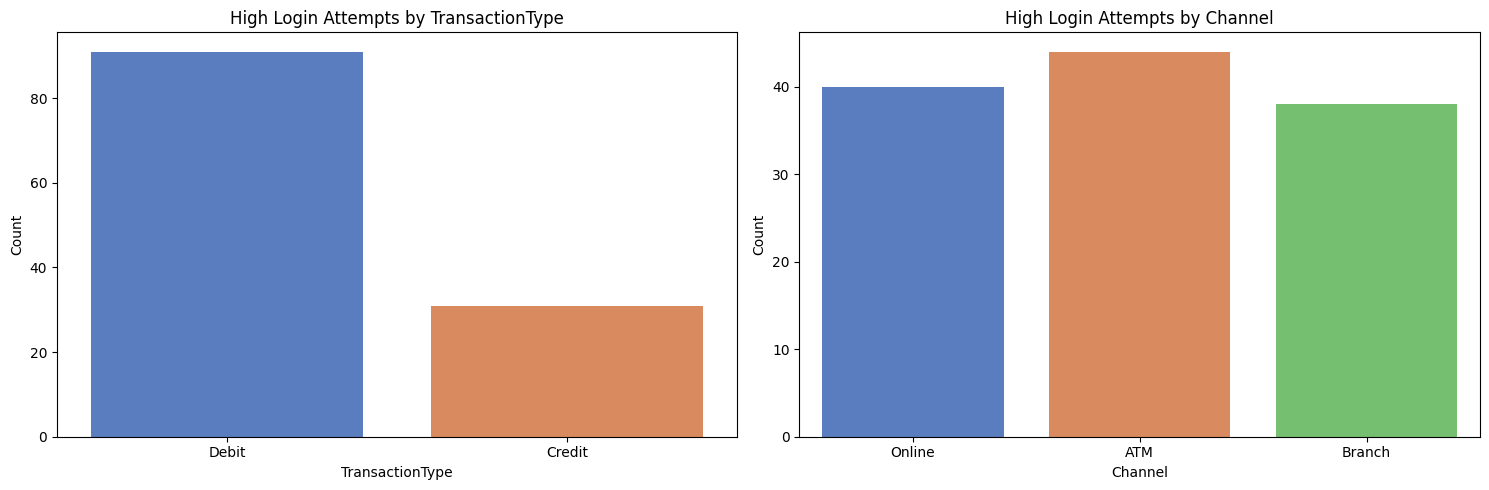

In [ ]:
# Transactions with more than one login attempt
high_login_attempts = df[df['LoginAttempts'] > 1]
print(f"Number of transactions with more than one login attempt: {len(high_login_attempts)}")
display(high_login_attempts.head())

# Distribution of Login Attempts
plt.figure(figsize=(10, 5))
sns.histplot(df['LoginAttempts'], bins=30, kde=True)
plt.title('Distribution of Login Attempts')
plt.xlabel('Number of Login Attempts')
plt.ylabel('Frequency')
plt.show()

# Relationship between Login Attempts and TransactionAmount
plt.figure(figsize=(10, 5))
sns.boxplot(x='LoginAttempts', y='TransactionAmount', data=df, palette='muted')
plt.title('TransactionAmount Distribution by Login Attempts')
plt.xlabel('Number of Login Attempts')
plt.ylabel('TransactionAmount')
plt.show()

# Analyzing high login attempts with respect to TransactionType and Channel
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=high_login_attempts, x='TransactionType', palette='muted')
plt.title('High Login Attempts by TransactionType')
plt.xlabel('TransactionType')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(data=high_login_attempts, x='Channel', palette='muted')
plt.title('High Login Attempts by Channel')
plt.xlabel('Channel')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

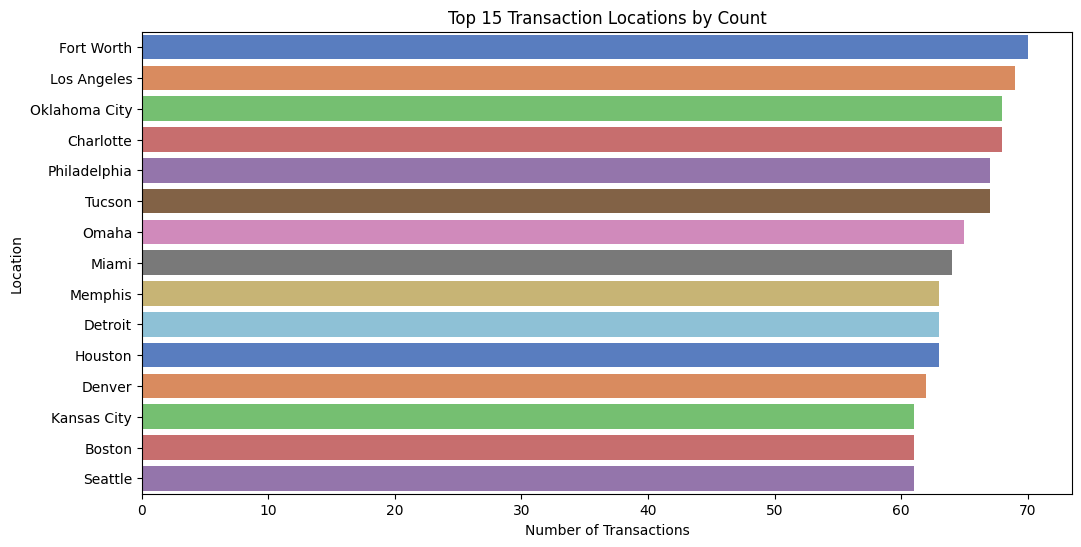

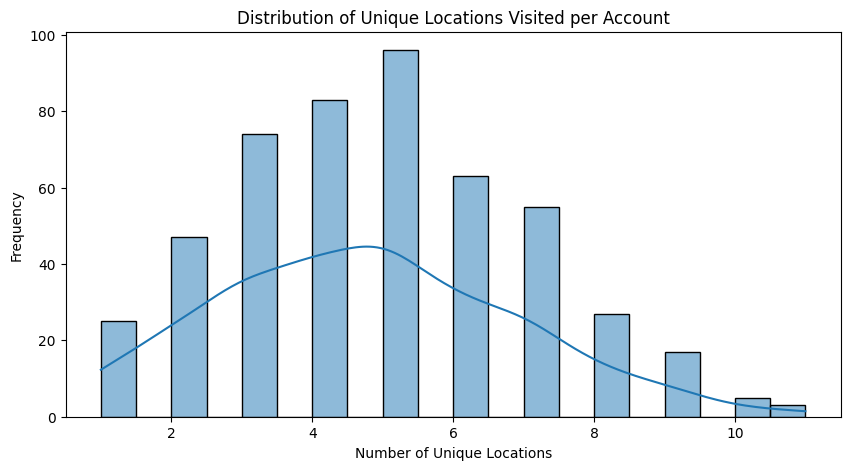


Number of accounts with transactions from multiple locations: 349


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,BalanceChange,UniqueLocations
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,5098.12,7
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,13382.67,7
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,996.06,4
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,8384.56,7
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,7442.85,6



Identifying Accounts with Significant Location Shifts:


,AccountID,UniqueLocations
1,AC00002,7
2,AC00003,5
3,AC00004,9
4,AC00005,9
6,AC00007,5
8,AC00009,5
9,AC00010,7
10,AC00011,5
11,AC00012,6
12,AC00013,7


In [ ]:
# Tính số lượng địa điểm duy nhất mỗi AccountID
location_counts = df.groupby('AccountID')['Location'].nunique().reset_index().rename(columns={'Location': 'UniqueLocationsCount'})

# Gộp thông tin này vào dataframe gốc
df = df.merge(location_counts, on='AccountID')

# Vẽ phân phối số lượng địa điểm giao dịch trên mỗi account
plt.figure(figsize=(10, 5))
sns.histplot(location_counts['UniqueLocationsCount'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Unique Transaction Locations per Account', fontsize=14)
plt.xlabel('Number of Unique Locations', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

# Lọc các account có nhiều hơn 5 địa điểm giao dịch
high_location_variability = df[df['UniqueLocationsCount'] > 5]
print(f"Number of accounts with high location variability (>5 locations): {len(high_location_variability['AccountID'].unique())}")
display(high_location_variability.head())

# Thống kê Top 15 địa điểm có nhiều giao dịch nhất
plt.figure(figsize=(12, 6))
top_locations = df['Location'].value_counts().nlargest(15)
sns.barplot(x=top_locations.values, y=top_locations.index, palette='muted')
plt.title('Top 15 Transaction Locations by Count', fontsize=14)
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.tight_layout()
plt.show()

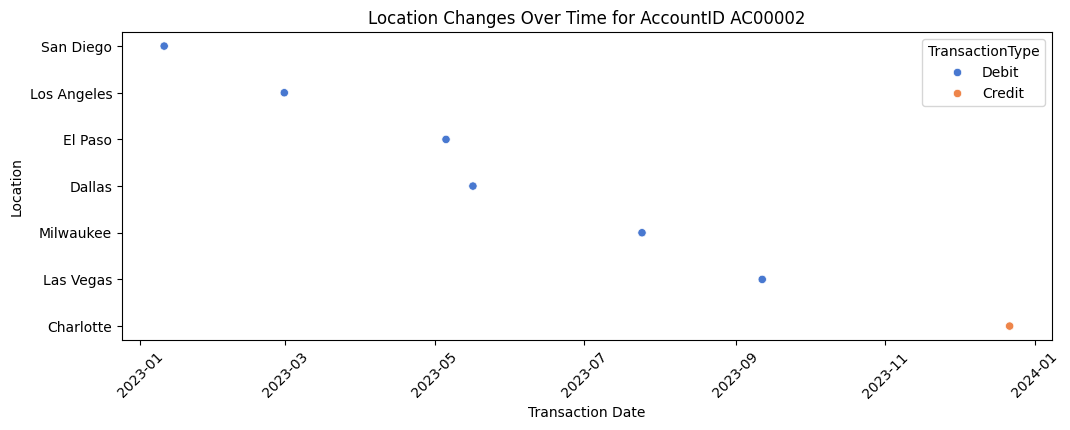

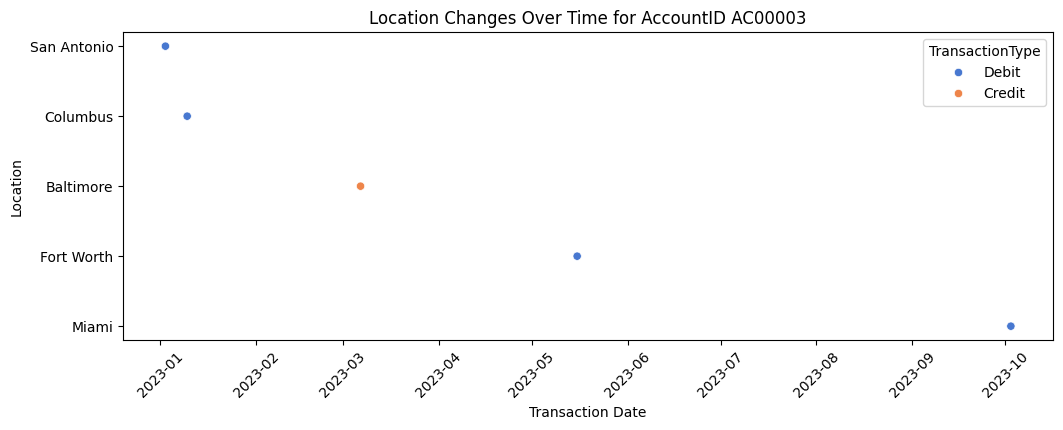

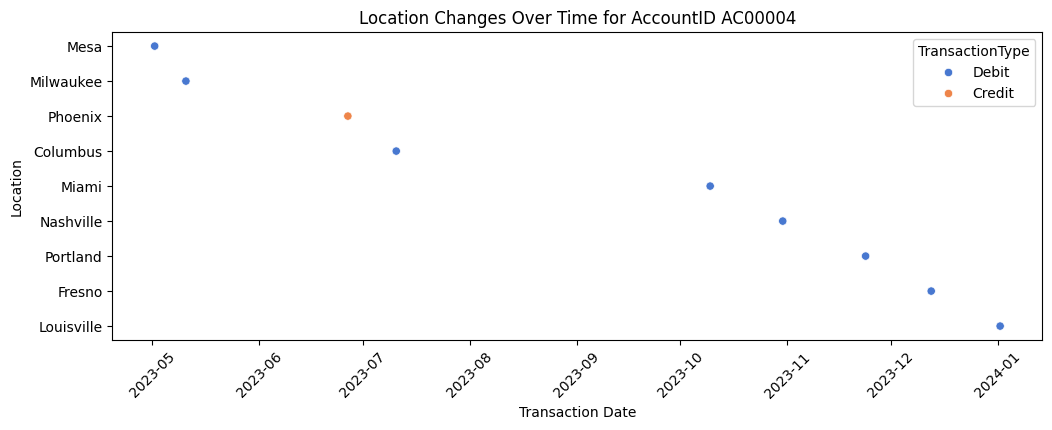

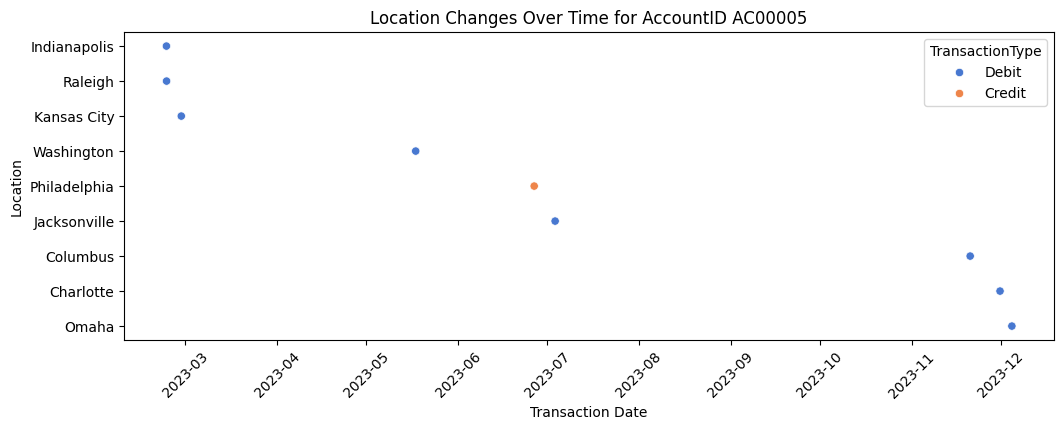

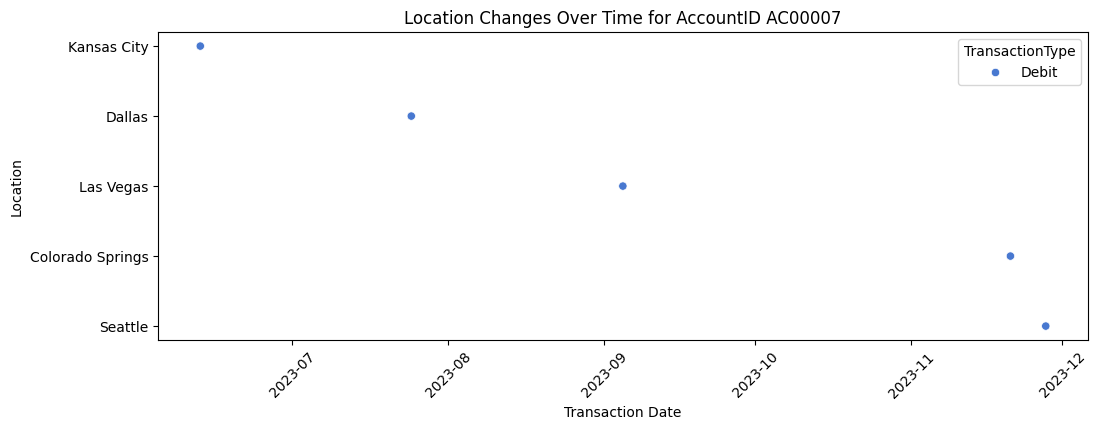

In [ ]:
# Visualize Transactions Across Locations Over Time for Selected Accounts
selected_accounts = significant_location_shifts['AccountID'].head(5)
for account_id in selected_accounts:
    account_data = df[df['AccountID'] == account_id].sort_values(by='TransactionDate')
    plt.figure(figsize=(12, 4))
    sns.scatterplot(x=account_data['TransactionDate'], y=account_data['Location'], hue=account_data['TransactionType'], palette='muted')
    plt.title(f'Location Changes Over Time for AccountID {account_id}')
    plt.xlabel('Transaction Date')
    plt.ylabel('Location')
    plt.xticks(rotation=45)
    plt.legend(title='TransactionType')
    plt.show()

Number of transactions during unusual hours: 377


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,BalanceChange,TransactionHour
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,996.06,18
17,TX000018,AC00359,492.93,2023-12-14 18:32:14,Debit,Columbus,D000432,114.223.129.47,M059,Online,39,Engineer,234,1,5109.97,2024-11-04 08:11:51,4617.04,18
19,TX000020,AC00285,71.48,2023-06-08 18:18:50,Credit,Columbus,D000039,120.170.93.69,M039,Online,18,Student,169,1,6568.59,2024-11-04 08:09:20,6640.07,18
21,TX000022,AC00014,85.77,2023-08-11 18:31:31,Debit,Las Vegas,D000268,59.132.247.252,M065,Branch,38,Doctor,93,1,9146.19,2024-11-04 08:08:13,9060.42,18
22,TX000023,AC00095,52.20,2023-06-06 18:54:15,Debit,Atlanta,D000142,133.63.96.21,M022,Online,39,Engineer,120,1,8974.93,2024-11-04 08:07:01,8922.73,18


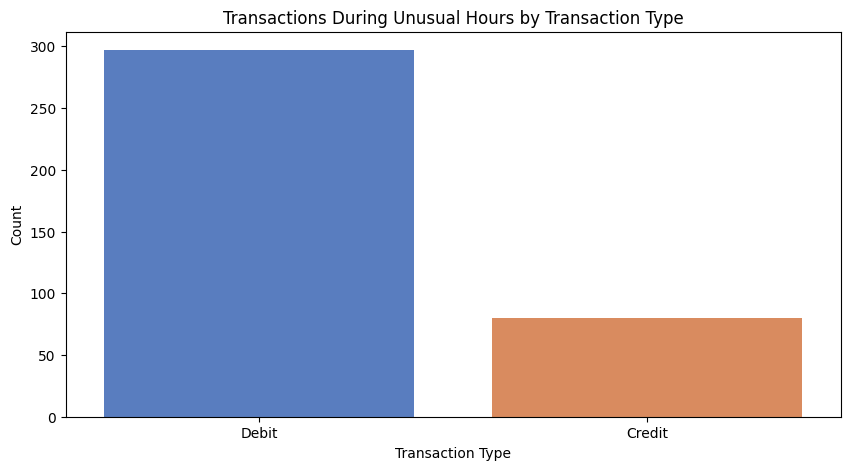

In [ ]:
# Ensure TransactionDate is in datetime format and extract the hour
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')
df['TransactionHour'] = df['TransactionDate'].dt.hour

# Define unusual hours (outside 9 AM - 6 PM)
unusual_hours = list(range(0, 9)) + list(range(18, 24))

# Filter transactions during unusual hours
unusual_hour_transactions = df[df['TransactionHour'].isin(unusual_hours)]

print(f"Number of transactions during unusual hours: {len(unusual_hour_transactions)}")
display(unusual_hour_transactions.head())

# Visualize transactions during unusual hours by type
plt.figure(figsize=(10, 5))
sns.countplot(data=unusual_hour_transactions, x='TransactionType', palette='muted')
plt.title('Transactions During Unusual Hours by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

Number of unusually high-value transactions: 62


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,BalanceChange,TransactionHour,AverageTransactionAmount
60,TX000061,AC00438,568.52,2023-10-06 18:44:37,Debit,Indianapolis,D000233,27.143.109.203,M094,ATM,46,Engineer,152,1,5499.91,2024-11-04 08:06:25,4931.39,18,165.691250
129,TX000130,AC00320,1036.66,2023-07-11 16:39:53,Debit,San Antonio,D000015,53.218.177.171,M062,Branch,58,Doctor,144,1,5541.57,2024-11-04 08:09:24,4504.91,16,335.652000
141,TX000142,AC00114,1049.92,2023-10-23 16:50:33,Debit,Detroit,D000522,121.67.144.20,M052,ATM,80,Retired,21,1,2037.85,2024-11-04 08:10:34,987.93,16,317.322857
176,TX000177,AC00363,1362.55,2023-02-10 18:07:07,Debit,El Paso,D000213,93.52.44.101,M001,ATM,29,Engineer,106,1,2429.68,2024-11-04 08:11:05,1067.13,18,391.909167
190,TX000191,AC00396,1422.55,2023-07-10 17:49:18,Debit,Washington,D000569,188.124.181.12,M072,Branch,79,Retired,165,1,5674.32,2024-11-04 08:06:50,4251.77,17,410.837500


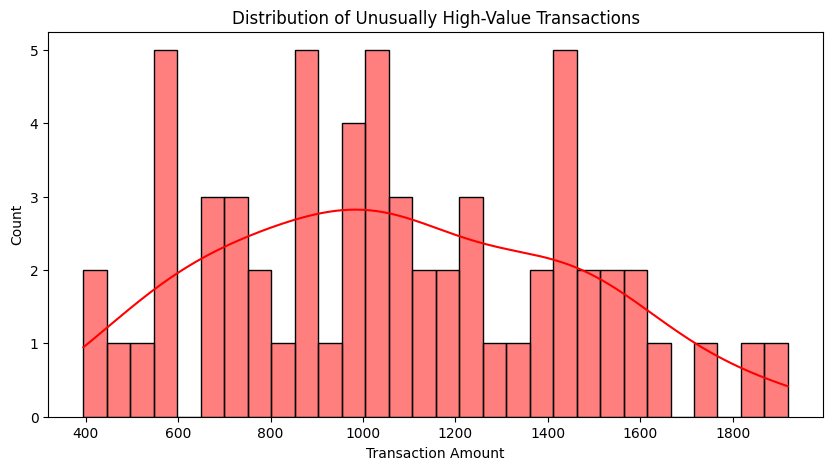

In [ ]:
# Calculate average transaction amount per account
account_avg = df.groupby('AccountID')['TransactionAmount'].mean().reset_index().rename(columns={'TransactionAmount': 'AverageTransactionAmount'})
df = df.merge(account_avg, on='AccountID')
# Identify transactions that are 3 times above the average for the account
unusual_transactions = df[df['TransactionAmount'] > (df['AverageTransactionAmount'] * 3)]
print(f"Number of unusually high-value transactions: {len(unusual_transactions)}")
display(unusual_transactions.head())

# Plot unusually high transactions
plt.figure(figsize=(10, 5))
sns.histplot(unusual_transactions['TransactionAmount'], bins=30, kde=True, color='red')
plt.title('Distribution of Unusually High-Value Transactions')
plt.xlabel('Transaction Amount')
plt.show()

  Channel TransactionType  Count
0     ATM          Credit     73
1     ATM           Debit    760
2  Branch          Credit    251
3  Branch           Debit    617
4  Online          Credit    244
5  Online           Debit    567


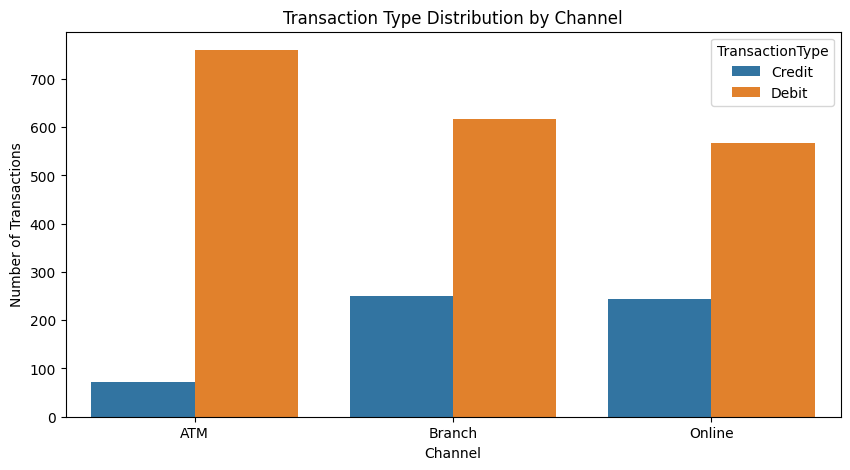

In [ ]:
# Analyze fraud likelihood by channel and transaction type
channel_analysis = df.groupby(['Channel', 'TransactionType'])['TransactionID'].count().reset_index()
channel_analysis.columns = ['Channel', 'TransactionType', 'Count']
print(channel_analysis)

# Plot distribution of transactions by channel and type
plt.figure(figsize=(10, 5))
sns.barplot(data=channel_analysis, x='Channel', y='Count', hue='TransactionType')
plt.title('Transaction Type Distribution by Channel')
plt.xlabel('Channel')
plt.ylabel('Number of Transactions')
plt.show()

Number of identified outlier merchants: 66


,MerchantID,TotalTransactions,AverageTransactionAmount,MaxTransactionAmount,StdTransactionAmount
3,M004,31,265.268387,1309.79,348.948133
4,M005,32,346.872813,1168.26,314.297555
5,M006,16,383.873125,1154.79,309.952846
8,M009,30,350.868000,1162.42,346.133895
11,M012,21,409.340952,1831.02,453.717576
...,...,...,...,...,...
67,M068,32,302.502187,1192.95,249.361991
86,M087,25,227.976400,1020.73,264.217926
87,M088,30,300.054333,1454.52,276.328185
89,M090,24,175.532500,1076.98,241.480707


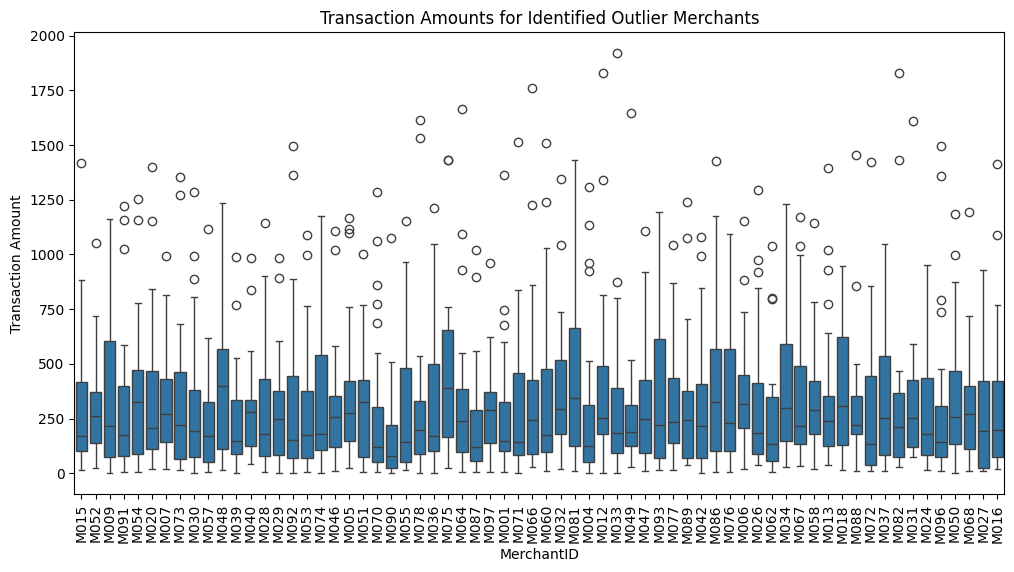

In [ ]:
# Calculate merchant statistics
merchant_stats = df.groupby('MerchantID')['TransactionAmount'].agg(
    TotalTransactions='count',
    AverageTransactionAmount='mean',
    MaxTransactionAmount='max',
    StdTransactionAmount='std'
).reset_index()

# Define criteria for outliers
overall_std = df['TransactionAmount'].std()
overall_mean = df['TransactionAmount'].mean()

high_std_merchants = merchant_stats[merchant_stats['StdTransactionAmount'] > overall_std]
high_value_merchants = merchant_stats[merchant_stats['MaxTransactionAmount'] > (overall_mean * 3)]
high_transaction_count_merchants = merchant_stats[merchant_stats['TotalTransactions'] > merchant_stats['TotalTransactions'].quantile(0.95)]

# Combine criteria
outlier_merchants = pd.concat([high_std_merchants, high_value_merchants, high_transaction_count_merchants]).drop_duplicates()

# Visualize and analyze
print(f"Number of identified outlier merchants: {len(outlier_merchants)}")
display(outlier_merchants)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['MerchantID'].isin(outlier_merchants['MerchantID'])], x='MerchantID', y='TransactionAmount')
plt.xticks(rotation=90)
plt.title('Transaction Amounts for Identified Outlier Merchants')
plt.xlabel('MerchantID')
plt.ylabel('Transaction Amount')
plt.show()

Number of devices used for multiple accounts: 609


,DeviceID,UniqueAccounts
0,D000001,4
1,D000002,5
2,D000003,2
3,D000004,4
4,D000005,6
...,...,...
676,D000696,2
677,D000697,9
678,D000698,3
679,D000699,2


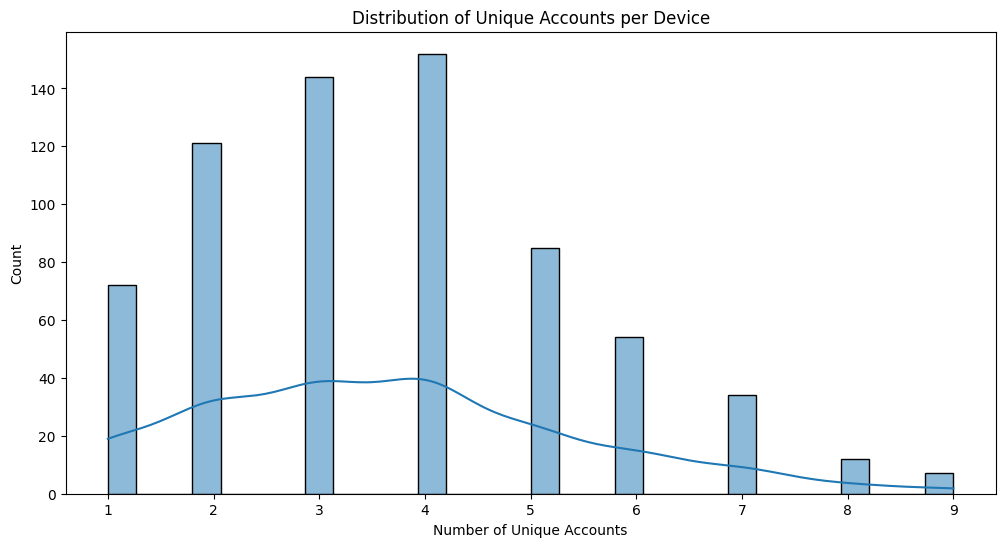

In [ ]:
# Multiple Accounts Using the Same Device
# Count unique accounts per DeviceID
device_account_counts = df.groupby('DeviceID')['AccountID'].nunique().reset_index().rename(columns={'AccountID': 'UniqueAccounts'})
# Identify devices associated with more than one account
suspicious_devices = device_account_counts[device_account_counts['UniqueAccounts'] > 1]
print(f"Number of devices used for multiple accounts: {len(suspicious_devices)}")
display(suspicious_devices)

# Visualize the distribution
plt.figure(figsize=(12, 6))
sns.histplot(device_account_counts['UniqueAccounts'], bins=30, kde=True)
plt.title('Distribution of Unique Accounts per Device')
plt.xlabel('Number of Unique Accounts')
plt.show()

Number of IP addresses used by multiple accounts: 552


,IP Address,UniqueAccounts
0,1.198.76.182,8
1,1.238.163.61,3
2,1.7.29.72,2
3,1.98.25.114,3
4,10.144.131.89,3


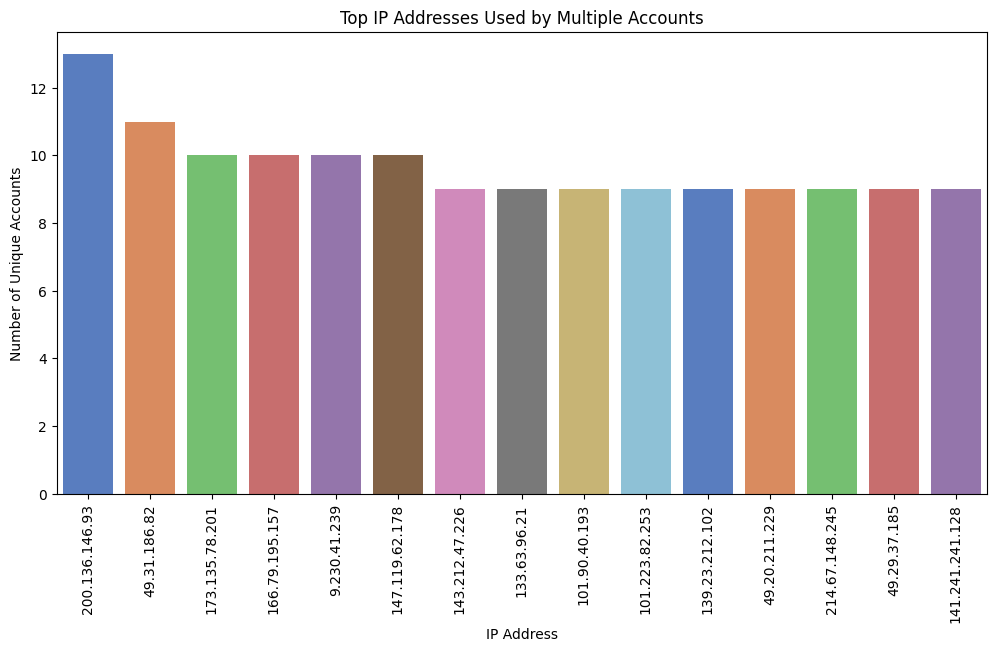

In [ ]:
# Multiple Accounts Using the Same IP Address
ip_counts = df.groupby('IP Address')['AccountID'].nunique().reset_index()
ip_counts.columns = ['IP Address', 'UniqueAccounts']
shared_ips = ip_counts[ip_counts['UniqueAccounts'] > 1]
print(f"Number of IP addresses used by multiple accounts: {len(shared_ips)}")
display(shared_ips.head())

# Bar Plot: Top IP addresses used by multiple accounts
plt.figure(figsize=(12, 6))
top_shared_ips = shared_ips.sort_values(by='UniqueAccounts', ascending=False).head(15)  # Display top 15 for clarity
sns.barplot(x=top_shared_ips['IP Address'], y=top_shared_ips['UniqueAccounts'], palette='muted')
plt.title('Top IP Addresses Used by Multiple Accounts')
plt.xlabel('IP Address')
plt.ylabel('Number of Unique Accounts')
plt.xticks(rotation=90)
plt.show()

Number of accounts with high IP variability: 366


,AccountID,UniqueIPAddresses
1,AC00002,7
2,AC00003,5
3,AC00004,9
4,AC00005,9
5,AC00006,4
...,...,...
489,AC00495,8
491,AC00497,6
492,AC00498,8
493,AC00499,7


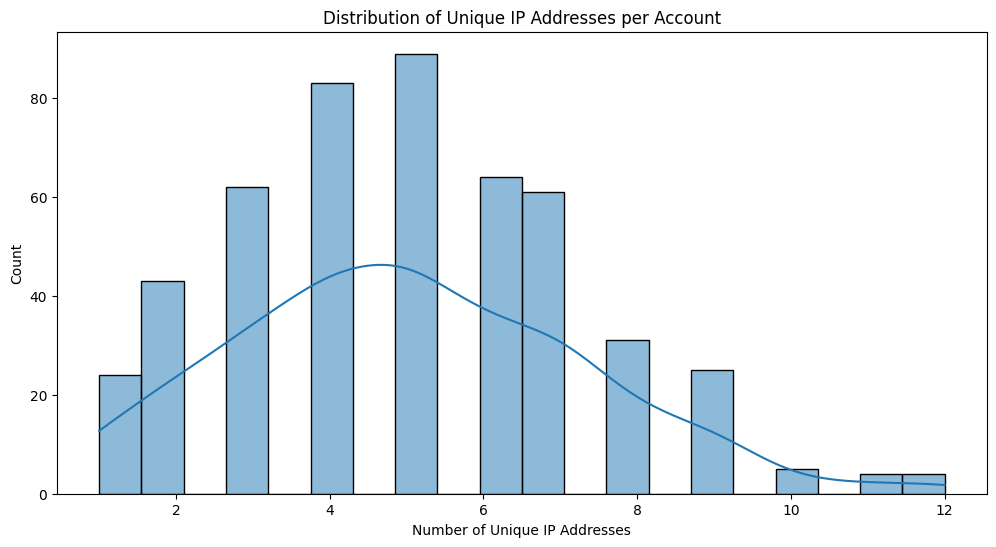

In [ ]:
# Frequent IP Changes for a Single Account
# Group by AccountID to count unique IP Addresses
ip_variability = df.groupby('AccountID')['IP Address'].nunique().reset_index().rename(columns={'IP Address': 'UniqueIPAddresses'})
# Identify accounts with a high number of unique IP Addresses
high_ip_variability_accounts = ip_variability[ip_variability['UniqueIPAddresses'] > 3]  # Example threshold
print(f"Number of accounts with high IP variability: {len(high_ip_variability_accounts)}")
display(high_ip_variability_accounts)

# Plot distribution of unique IP addresses per account
plt.figure(figsize=(12, 6))
sns.histplot(ip_variability['UniqueIPAddresses'], bins=20, kde=True)
plt.title('Distribution of Unique IP Addresses per Account')
plt.xlabel('Number of Unique IP Addresses')
plt.show()

Number of transactions with long duration (top 5%): 123


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,BalanceChange,TransactionHour,AverageTransactionAmount,UniqueLocationsCount
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Credit,Indianapolis,D000500,92.214.76.157,M020,Branch,67,Retired,291,1,2796.24,2024-11-04 08:10:55,2967.66,17,231.082857,6
25,TX000026,AC00041,7.49,2023-10-20 17:53:13,Credit,Houston,D000671,81.248.235.147,M043,Online,65,Retired,276,1,3634.67,2024-11-04 08:09:44,3642.16,17,164.240000,7
29,TX000030,AC00313,56.17,2023-09-20 16:55:42,Debit,Detroit,D000297,33.28.138.82,M043,Branch,27,Student,283,1,1351.69,2024-11-04 08:08:30,1295.52,16,247.900000,3
73,TX000074,AC00110,233.92,2023-10-20 16:54:28,Credit,Jacksonville,D000295,152.140.239.181,M046,Online,26,Student,280,1,6537.62,2024-11-04 08:08:45,6771.54,16,313.471250,8
113,TX000114,AC00121,213.76,2023-03-01 17:52:14,Credit,Dallas,D000574,51.250.122.123,M009,ATM,78,Retired,282,1,3528.72,2024-11-04 08:09:36,3742.48,17,147.365000,2


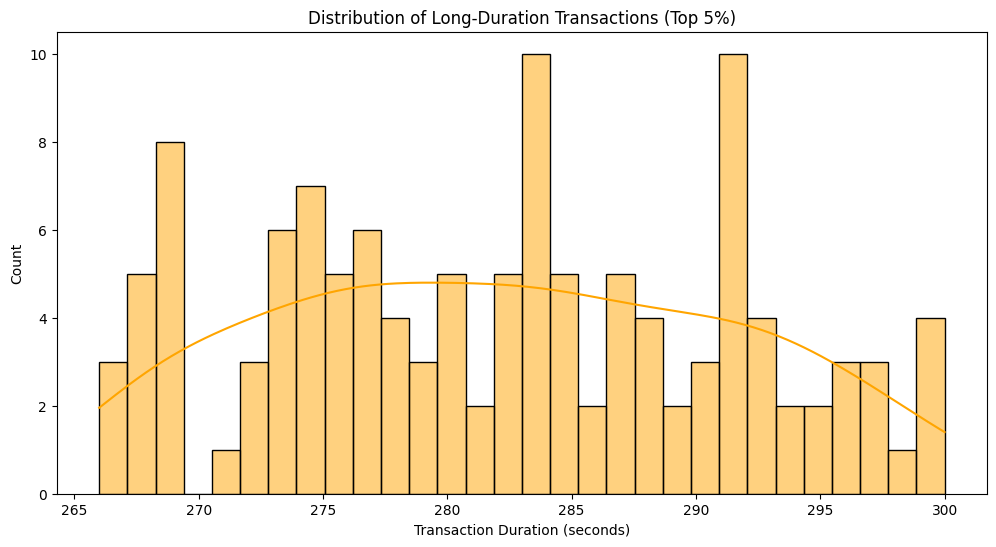

In [ ]:
# Identify transactions with unusually long durations
long_duration_threshold = df['TransactionDuration'].quantile(0.95)  # Top 5% as threshold
long_duration_transactions = df[df['TransactionDuration'] > long_duration_threshold]
print(f"Number of transactions with long duration (top 5%): {len(long_duration_transactions)}")
display(long_duration_transactions.head())

# Plot distribution of long-duration transactions
plt.figure(figsize=(12, 6))
sns.histplot(long_duration_transactions['TransactionDuration'], bins=30, kde=True, color='orange')
plt.title('Distribution of Long-Duration Transactions (Top 5%)')
plt.xlabel('Transaction Duration (seconds)')
plt.show()

# **Anomaly Detection**

## Identifying Potential Frauds with K-means Clustering

In [ ]:
# Select features for clustering
features = ['TransactionAmount', 'TransactionDuration']
X = df[features].copy()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 10)  # Test for clusters from 1 to 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

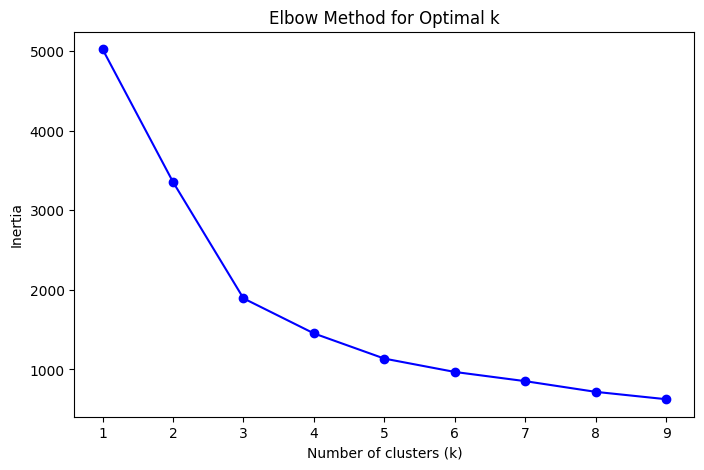

In [ ]:
# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
# Fit K-means with the chosen number of clusters (k=3)
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled)

# Assign clusters and calculate distance to cluster centroid
df['Cluster'] = kmeans.labels_
df['DistanceToCentroid'] = np.linalg.norm(X_scaled - kmeans.cluster_centers_[kmeans.labels_], axis=1)

# Identify potential frauds based on distance threshold
threshold = df['DistanceToCentroid'].quantile(0.95)
potential_frauds = df[df['DistanceToCentroid'] > threshold]

print(f"Number of potential frauds detected: {len(potential_frauds)}")
display(potential_frauds)

Number of potential frauds detected: 126


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,BalanceChange,TransactionHour,AverageTransactionAmount,UniqueLocationsCount,Cluster,DistanceToCentroid
74,TX000075,AC00265,1212.51,2023-10-04 16:36:29,Debit,Indianapolis,D000231,193.83.0.183,M036,Branch,...,24,1,605.95,2024-11-04 08:06:51,-606.56,16,439.288889,9,0,1.876727
85,TX000086,AC00098,1340.19,2023-09-29 17:22:10,Credit,Austin,D000574,165.114.224.47,M012,Online,...,30,1,8654.28,2024-11-04 08:06:53,9994.47,17,642.514000,5,0,2.163279
141,TX000142,AC00114,1049.92,2023-10-23 16:50:33,Debit,Detroit,D000522,121.67.144.20,M052,ATM,...,21,1,2037.85,2024-11-04 08:10:34,987.93,16,317.322857,7,0,1.562140
142,TX000143,AC00163,227.14,2023-07-03 17:42:08,Debit,Charlotte,D000439,197.162.55.147,M057,ATM,...,294,1,341.94,2024-11-04 08:11:34,114.80,17,307.955000,2,2,1.521390
146,TX000147,AC00385,973.39,2023-08-30 17:23:20,Debit,Sacramento,D000292,202.194.199.70,M026,Branch,...,296,1,2042.22,2024-11-04 08:11:44,1068.83,17,591.600000,7,0,2.640557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2403,TX002404,AC00111,1493.00,2023-06-07 17:05:41,Debit,Colorado Springs,D000344,136.162.111.135,M096,ATM,...,151,1,1619.16,2024-11-04 08:07:07,126.16,17,438.818571,6,0,2.368753
2414,TX002415,AC00028,1664.33,2023-09-25 17:11:19,Debit,San Antonio,D000072,116.106.207.139,M064,Branch,...,65,1,1588.31,2024-11-04 08:07:07,-76.02,17,723.390000,3,0,2.986511
2439,TX002440,AC00439,538.17,2023-09-26 17:27:17,Credit,Washington,D000430,116.44.12.250,M055,Branch,...,252,1,5908.04,2024-11-04 08:10:25,6446.21,17,465.090000,7,2,1.490003
2445,TX002446,AC00439,403.01,2023-09-04 17:32:35,Debit,Washington,D000677,223.32.70.156,M029,Online,...,286,3,10513.52,2024-11-04 08:09:32,10110.51,17,465.090000,7,2,1.573122


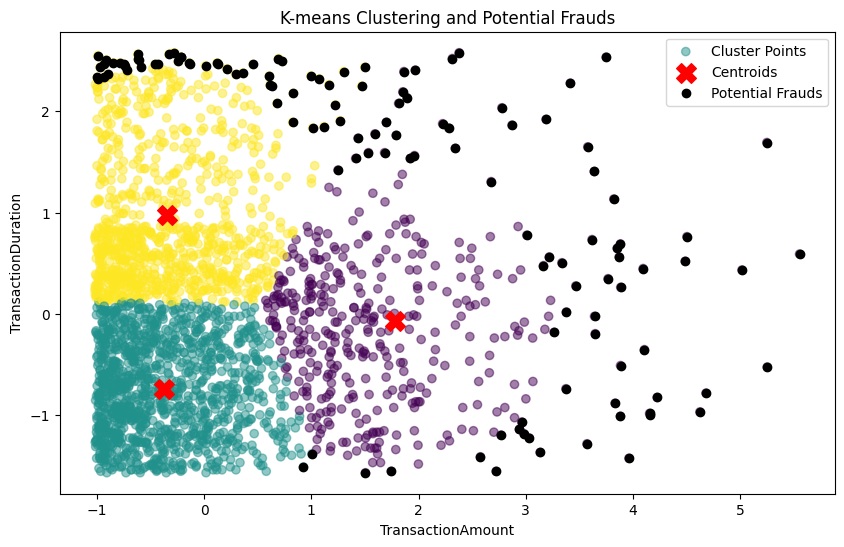

In [ ]:
# Visualize clusters and potential frauds (2D plot for simplicity with legend)
plt.figure(figsize=(10, 6))

# Plotting clusters
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5, label='Cluster Points')

# Plotting cluster centroids
centroids = plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')

# Plotting potential frauds
frauds = plt.scatter(X_scaled[potential_frauds.index, 0], X_scaled[potential_frauds.index, 1], c='black', label='Potential Frauds', edgecolors='k')

plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('K-means Clustering and Potential Frauds')
plt.legend(loc='upper right')
plt.show()

## DBSCAN Clustering for Anomaly Detection

In [ ]:
# Map the cluster labels to descriptive names
label_mapping = {
    -1: 'Fraud (Outliers)',  # Default noise label for DBSCAN
    0: 'Normal',
    1: 'Suspicious Group 1',
    2: 'Suspicious Group 2',
    3: 'Suspicious Group 3',
    4: 'Suspicious Group 4',
}

# Select relevant features for DBSCAN
features = ['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'LoginAttempts']
X = df[features].copy()
X = X.fillna(X.mean())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan.fit(X_scaled)

# Add labels to the dataframe
df['DBSCAN_Cluster'] = dbscan.labels_

# Map cluster labels to descriptive names
df['Cluster_Description'] = df['DBSCAN_Cluster'].map(label_mapping)

# Identify outliers (noise points) labeled as -1
potential_frauds = df[df['DBSCAN_Cluster'] == -1]
print(f"Number of potential frauds detected by DBSCAN: {len(potential_frauds)}")
display(potential_frauds.head())

Number of potential frauds detected by DBSCAN: 17


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,AccountBalance,PreviousTransactionDate,BalanceChange,TransactionHour,AverageTransactionAmount,UniqueLocationsCount,Cluster,DistanceToCentroid,DBSCAN_Cluster,Cluster_Description
274,TX000275,AC00454,1176.28,2023-12-20 16:08:02,Credit,Kansas City,D000476,50.202.8.53,M074,ATM,...,323.69,2024-11-04 08:11:44,1499.97,16,494.182500,4,0,1.488559,-1,Fraud (Outliers)
454,TX000455,AC00264,611.11,2023-10-18 18:32:31,Debit,Detroit,D000215,141.201.46.191,M045,ATM,...,919.84,2024-11-04 08:11:12,308.73,18,441.255000,6,2,1.959599,-1,Fraud (Outliers)
653,TX000654,AC00423,1919.11,2023-06-27 17:48:25,Debit,Portland,D000191,207.157.126.125,M033,ATM,...,11090.24,2024-11-04 08:10:27,9171.13,17,506.356667,5,0,3.828962,-1,Fraud (Outliers)
693,TX000694,AC00011,733.29,2023-03-15 18:42:16,Debit,Virginia Beach,D000618,16.51.235.240,M032,ATM,...,10427.00,2024-11-04 08:07:12,9693.71,18,348.322857,5,0,0.418493,-1,Fraud (Outliers)
754,TX000755,AC00153,84.34,2023-06-08 16:27:56,Debit,Memphis,D000493,200.136.146.93,M039,Online,...,5313.97,2024-11-04 08:09:31,5229.63,16,350.270000,7,2,0.940290,-1,Fraud (Outliers)


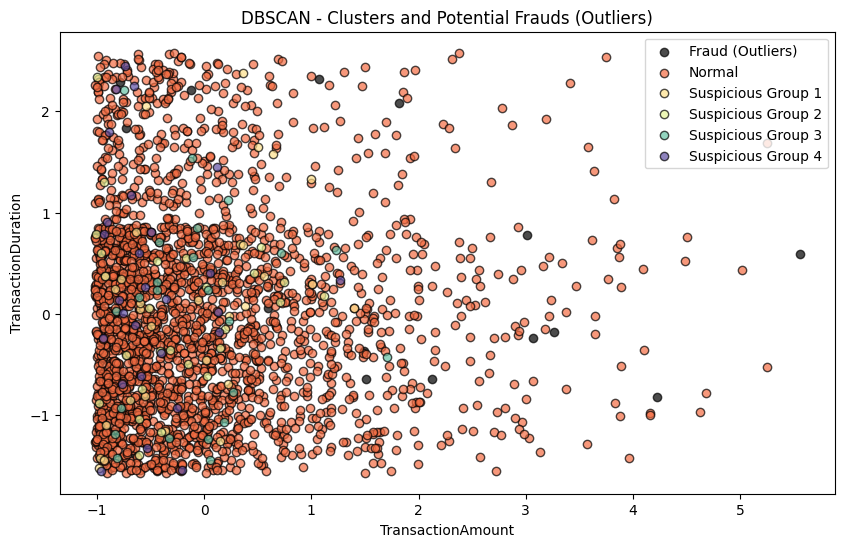

In [ ]:
# Visualize clusters and potential frauds
plt.figure(figsize=(10, 6))
unique_labels = np.unique(dbscan.labels_)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise (outliers)
        col = [0, 0, 0, 1]
    class_member_mask = (dbscan.labels_ == k)
    xy = X_scaled[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], color=tuple(col), edgecolor='k', alpha=0.7, label=label_mapping.get(k, f'Cluster {k}'))

plt.title('DBSCAN - Clusters and Potential Frauds (Outliers)')
plt.xlabel(features[0])  # TransactionAmount
plt.ylabel(features[1])  # TransactionDuration
plt.legend()
plt.show()

## Isolation Forest for Anomaly Detection

In [ ]:
# Define outlier mapping
outlier_mapping = {1: 'Normal', -1: 'Potential Fraud'}

# Select relevant features for fraud detection
features = ['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'LoginAttempts']  # Modify as needed
X = df[features].copy()

X = X.fillna(X.mean())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_forest.fit(X_scaled)

# Predict anomalies
df['AnomalyScore'] = iso_forest.decision_function(X_scaled)
df['IsAnomaly'] = iso_forest.predict(X_scaled)

# Map results to descriptive labels
df['AnomalyLabel'] = df['IsAnomaly'].map(outlier_mapping)

# Filter out detected anomalies
potential_frauds = df[df['IsAnomaly'] == -1]
print(f"Number of potential frauds detected: {len(potential_frauds)}")
display(potential_frauds.head())

Number of potential frauds detected: 126


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,TransactionHour,AverageTransactionAmount,UniqueLocationsCount,Cluster,DistanceToCentroid,DBSCAN_Cluster,Cluster_Description,AnomalyScore,IsAnomaly,AnomalyLabel
26,TX000027,AC00441,246.93,2023-04-17 16:37:01,Debit,Miami,D000046,55.154.161.250,M029,ATM,...,16,317.948333,6,2,0.461840,2,Suspicious Group 2,-0.075150,-1,Potential Fraud
32,TX000033,AC00060,396.45,2023-09-25 16:26:00,Debit,New York,D000621,133.67.250.163,M007,ATM,...,16,388.180000,4,2,0.744993,1,Suspicious Group 1,-0.014181,-1,Potential Fraud
85,TX000086,AC00098,1340.19,2023-09-29 17:22:10,Credit,Austin,D000574,165.114.224.47,M012,Online,...,17,642.514000,5,0,2.163279,0,Normal,-0.018206,-1,Potential Fraud
91,TX000092,AC00310,223.85,2023-10-02 16:36:10,Debit,Kansas City,D000481,133.223.159.151,M009,ATM,...,16,439.977143,7,1,0.221557,4,Suspicious Group 4,-0.029888,-1,Potential Fraud
146,TX000147,AC00385,973.39,2023-08-30 17:23:20,Debit,Sacramento,D000292,202.194.199.70,M026,Branch,...,17,591.600000,7,0,2.640557,0,Normal,-0.016904,-1,Potential Fraud


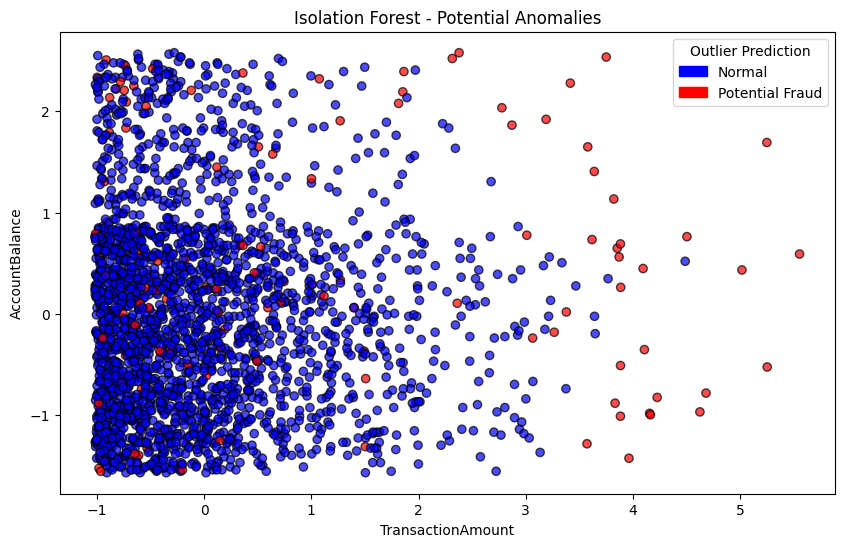

In [ ]:
colors = np.where(df['IsAnomaly'] == -1, 'r', 'b')

# Visualize potential frauds (TransactionAmount vs AccountBalance)
plt.figure(figsize=(10, 6))
plt.scatter(
    X_scaled[:, 0],
    X_scaled[:, 1],
    c=colors,
    cmap='coolwarm',
    alpha=0.7,
    edgecolors='k',
    label='Data Points'
)

# Custom legend
import matplotlib.patches as mpatches
normal_patch = mpatches.Patch(color='b', label='Normal')
fraud_patch = mpatches.Patch(color='r', label='Potential Fraud')
plt.legend(handles=[normal_patch, fraud_patch], title='Outlier Prediction')

plt.title('Isolation Forest - Potential Anomalies')
plt.xlabel(features[0])  # TransactionAmount
plt.ylabel(features[2])  # AccountBalance
plt.show()


Comparison of Potential Frauds Identified by Different Methods:
Total transactions flagged by at least one method: 209

Summary of Fraud Flags:
IsPotentialFraud_KMeans             126
IsPotentialFraud_DBSCAN              17
IsPotentialFraud_IsolationForest    126
Name: Total Flagged, dtype: int64

Transactions flagged by multiple methods:
Number of transactions flagged by more than one method: 54


,TransactionID,IsPotentialFraud_KMeans,IsPotentialFraud_DBSCAN,IsPotentialFraud_IsolationForest,FraudFlagsCount
274,TX000275,1,1,1,3
653,TX000654,1,1,1,3
772,TX000773,1,1,1,3
454,TX000455,1,1,1,3
898,TX000899,1,1,1,3
2149,TX002150,1,1,1,3
190,TX000191,1,0,1,2
486,TX000487,1,0,1,2
146,TX000147,1,0,1,2
340,TX000341,1,0,1,2


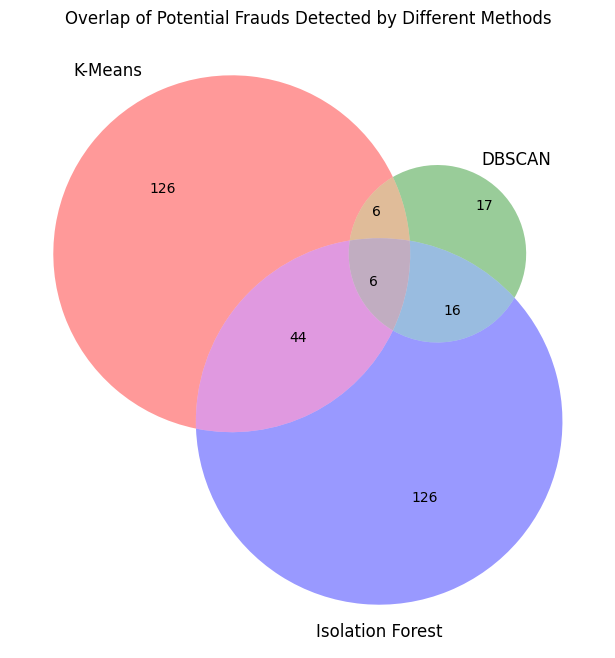


Characteristics of Transactions Flagged by Multiple Methods:


,TransactionID,TransactionAmount,TransactionDuration,AccountBalance,LoginAttempts,FraudFlagsCount,TransactionType,Channel,Location
0,TX000086,1340.19,30,8654.28,1,2,Credit,Online,Austin
1,TX000147,973.39,296,2042.22,1,2,Debit,Branch,Sacramento
2,TX000191,1422.55,165,5674.32,1,2,Debit,Branch,Washington
3,TX000275,1176.28,174,323.69,5,3,Credit,ATM,Kansas City
4,TX000341,1830.00,238,2235.70,1,2,Debit,Online,San Antonio


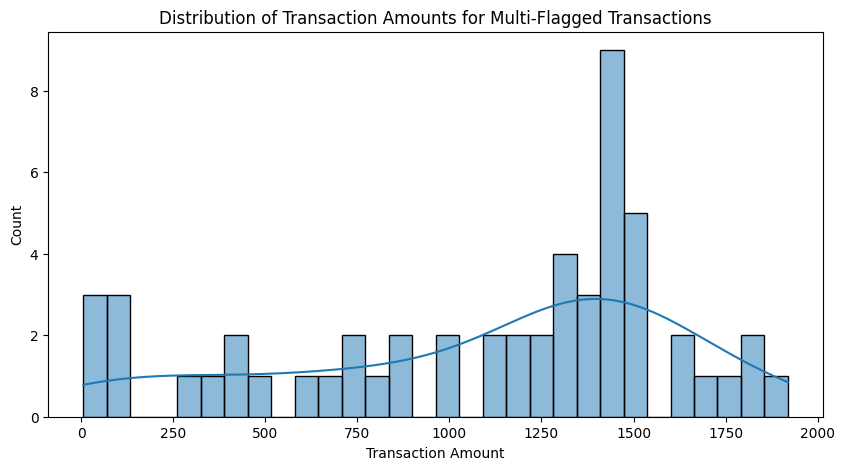

In [ ]:
# prompt: tích hợp function để so sánh kết quả của 3 thuật toán K-means, DBSCAN, Isolation Forest đã dùng ở trên. Viết tiếp code thôi, nếu cần input thêm thì chỉ input mấy cái chưa có

import pandas as pd
import matplotlib.pyplot as plt
# Function to compare potential frauds identified by different methods
def compare_fraud_detection_methods(df):
    """
    Compares the potential frauds identified by K-means, DBSCAN, and Isolation Forest.

    Args:
        df (pd.DataFrame): The DataFrame containing the results of each method.

    Returns:
        pd.DataFrame: A DataFrame indicating whether each transaction was flagged as
                      potential fraud by each method.
    """
    # Ensure the necessary columns exist from previous steps
    required_cols = ['DistanceToCentroid', 'DBSCAN_Cluster', 'IsAnomaly']
    if not all(col in df.columns for col in required_cols):
        print("Warning: Not all required columns for comparison are present.")
        print(f"Missing columns: {[col for col in required_cols if col not in df.columns]}")
        return pd.DataFrame()

    # Identify potential frauds from each method
    # K-means: based on distance to centroid threshold (using the same 0.95 quantile as before)
    kmeans_threshold = df['DistanceToCentroid'].quantile(0.95)
    df['IsPotentialFraud_KMeans'] = (df['DistanceToCentroid'] > kmeans_threshold).astype(int)

    # DBSCAN: based on the -1 label (noise points)
    df['IsPotentialFraud_DBSCAN'] = (df['DBSCAN_Cluster'] == -1).astype(int)

    # Isolation Forest: based on the IsAnomaly column (-1 indicates anomaly)
    df['IsPotentialFraud_IsolationForest'] = (df['IsAnomaly'] == -1).astype(int)

    # Create a comparison DataFrame
    comparison_df = df[['TransactionID', 'IsPotentialFraud_KMeans', 'IsPotentialFraud_DBSCAN', 'IsPotentialFraud_IsolationForest']]

    # Count how many methods flagged each transaction as potential fraud
    comparison_df['FraudFlagsCount'] = comparison_df[['IsPotentialFraud_KMeans', 'IsPotentialFraud_DBSCAN', 'IsPotentialFraud_IsolationForest']].sum(axis=1)

    # Filter for transactions flagged by at least one method
    flagged_transactions = comparison_df[comparison_df['FraudFlagsCount'] > 0]

    print("\nComparison of Potential Frauds Identified by Different Methods:")
    print(f"Total transactions flagged by at least one method: {len(flagged_transactions)}")

    # Summary of findings
    print("\nSummary of Fraud Flags:")
    print(comparison_df[['IsPotentialFraud_KMeans', 'IsPotentialFraud_DBSCAN', 'IsPotentialFraud_IsolationForest']].sum().rename('Total Flagged'))

    print("\nTransactions flagged by multiple methods:")
    multi_flagged = flagged_transactions[flagged_transactions['FraudFlagsCount'] > 1]
    print(f"Number of transactions flagged by more than one method: {len(multi_flagged)}")

    #return flagged_transactions.sort_values(by='FraudFlagsCount', ascending=False)
    return flagged_transactions.sort_values(by='FraudFlagsCount', ascending=False), multi_flagged


# Perform the comparison
# fraud_comparison_results = compare_fraud_detection_methods(df)
fraud_comparison_results, multi_flagged = compare_fraud_detection_methods(df)

# Display the comparison results (optional, can be large)
display(fraud_comparison_results.head(20))

# You can further analyze the `fraud_comparison_results` dataframe
# For example, visualize the overlap using a Venn diagram (requires matplotlib_venn)
try:
    !pip install matplotlib-venn
    from matplotlib_venn import venn3
    plt.figure(figsize=(8, 8))
    venn3(
        subsets=(
            df['IsPotentialFraud_KMeans'].sum(),
            df['IsPotentialFraud_DBSCAN'].sum(),
            df[(df['IsPotentialFraud_KMeans'] == 1) & (df['IsPotentialFraud_DBSCAN'] == 1)].shape[0],
            df['IsPotentialFraud_IsolationForest'].sum(),
            df[(df['IsPotentialFraud_KMeans'] == 1) & (df['IsPotentialFraud_IsolationForest'] == 1)].shape[0],
            df[(df['IsPotentialFraud_DBSCAN'] == 1) & (df['IsPotentialFraud_IsolationForest'] == 1)].shape[0],
            df[(df['IsPotentialFraud_KMeans'] == 1) & (df['IsPotentialFraud_DBSCAN'] == 1) & (df['IsPotentialFraud_IsolationForest'] == 1)].shape[0]
        ),
        set_labels=('K-Means', 'DBSCAN', 'Isolation Forest')
    )
    plt.title('Overlap of Potential Frauds Detected by Different Methods')
    plt.show()
except ImportError:
    print("\nTo visualize the overlap, please install matplotlib-venn: pip install matplotlib-venn")

# Further analysis: Look at the characteristics of transactions flagged by multiple methods
if not multi_flagged.empty:
    print("\nCharacteristics of Transactions Flagged by Multiple Methods:")
    # Merge with original data to get original features
    multi_flagged_details = multi_flagged.merge(df, on='TransactionID', how='left')
    display(multi_flagged_details[
        ['TransactionID'] + features + ['FraudFlagsCount', 'TransactionType', 'Channel', 'Location']
    ].head())

    # Example: Distribution of transaction amount for multi-flagged transactions
    plt.figure(figsize=(10, 5))
    sns.histplot(multi_flagged_details['TransactionAmount'], bins=30, kde=True)
    plt.title('Distribution of Transaction Amounts for Multi-Flagged Transactions')
    plt.xlabel('Transaction Amount')
    plt.show()


In [ ]:
! pip install streamlit -q

In [ ]:
!pip install kneed

In [ ]:
!wget -q -O - ipv4.icanhazip.com

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator

# Function to perform K-means clustering
def kmeans_clustering(df, features):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[features])

    # Determine optimal k using Elbow Method
    inertia = []
    K = range(1, 10)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X_scaled)
        inertia.append(kmeans.inertia_)

    # Find the elbow point
    kneedle = KneeLocator(K, inertia, curve="convex", direction="decreasing")
    optimal_k = kneedle.knee

    # Plot Elbow Method
    st.subheader("Elbow Method for Optimal k")
    plt.figure(figsize=(8, 5))
    plt.plot(K, inertia, 'bo-', label="Inertia")
    plt.axvline(x=optimal_k, color='r', linestyle='--', label=f"Optimal k = {optimal_k}")
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.legend()
    st.pyplot(plt)

    # Fit with the optimal k
    kmeans = KMeans(n_clusters=optimal_k, random_state=0)
    kmeans.fit(X_scaled)
    df['Cluster'] = kmeans.labels_
    df['DistanceToCentroid'] = np.linalg.norm(X_scaled - kmeans.cluster_centers_[kmeans.labels_], axis=1)

    threshold = df['DistanceToCentroid'].quantile(0.95)
    potential_frauds = df[df['DistanceToCentroid'] > threshold]

    st.write(f"Number of potential frauds detected: {len(potential_frauds)}")
    st.dataframe(potential_frauds)

    # Plot clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5, label='Cluster Points')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title(f'K-means Clustering (k={optimal_k}) and Potential Frauds')
    plt.legend()
    st.pyplot(plt)

# Function to perform DBSCAN clustering
def dbscan_clustering(df, features):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[features].fillna(df[features].mean()))

    dbscan = DBSCAN(eps=1.5, min_samples=5)
    dbscan.fit(X_scaled)
    df['DBSCAN_Cluster'] = dbscan.labels_

    potential_frauds = df[df['DBSCAN_Cluster'] == -1]
    st.write(f"Number of potential frauds detected by DBSCAN: {len(potential_frauds)}")
    st.dataframe(potential_frauds)

    # Visualize clusters
    plt.figure(figsize=(10, 6))
    unique_labels = np.unique(dbscan.labels_)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]  # Black for noise
        class_member_mask = (dbscan.labels_ == k)
        xy = X_scaled[class_member_mask]
        plt.scatter(xy[:, 0], xy[:, 1], color=tuple(col), edgecolor='k', alpha=0.7)

    plt.title('DBSCAN - Clusters and Potential Frauds')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    st.pyplot(plt)

# Function to perform Isolation Forest
def isolation_forest(df, features):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[features].fillna(df[features].mean()))

    iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
    iso_forest.fit(X_scaled)
    df['IsAnomaly'] = iso_forest.predict(X_scaled)

    potential_frauds = df[df['IsAnomaly'] == -1]
    st.write(f"Number of potential frauds detected by Isolation Forest: {len(potential_frauds)}")
    st.dataframe(potential_frauds)

    # Visualize anomalies
    colors = np.where(df['IsAnomaly'] == -1, 'r', 'b')
    plt.figure(figsize=(10, 6))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=colors, alpha=0.7, edgecolors='k')
    plt.title('Isolation Forest - Potential Anomalies')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    st.pyplot(plt)

# Streamlit UI
st.title("Anomaly Detection Application")

# File uploader
uploaded_file = st.file_uploader("Upload your CSV file", type="csv")
if uploaded_file:
    df = pd.read_csv(uploaded_file)
    st.write("Dataset Preview:")
    st.dataframe(df.head())

    # Feature selection
    features = st.multiselect("Select features for analysis", options=df.columns.tolist(), default=df.columns[:2].tolist())

    if st.button("Run K-means Clustering"):
        kmeans_clustering(df, features)

    if st.button("Run DBSCAN"):
        dbscan_clustering(df, features)

    if st.button("Run Isolation Forest"):
        isolation_forest(df, features)

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501